# Song Recommendation System: Cohort of Songs

## Problem Scenario
The customer always looks forward to specialized treatment, whether shopping on an e-commerce website or watching Netflix. The customer desires content that aligns with their preferences. To maintain customer engagement, companies must consistently provide the most relevant information. 

Starting with Spotify, a Swedish audio streaming and media service provider, boasts over 456 million active monthly users, including more than 195 million paid subscribers as of September 2022. The company aims to create cohorts of different songs to enhance song recommendations. These cohorts will be based on various relevant features, ensuring that each group contains similar types of songs. 

## Imports

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

<span style="color: red; font-size: 30px">Change **viewPlots** below if you want to run plots!!</span>

In [47]:
viewPlots = True

In [48]:
pd.set_option("display.max_columns", None)

## Data Overview

In [49]:
spotify_df = pd.read_csv("../data/rolling_stones_spotify.csv", index_col=0)
spotify_df

name               album release_date  \
0      Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1      Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2              Start Me Up - Live  Licked Live In NYC   2022-06-10   
3     If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4               Don’t Stop - Live  Licked Live In NYC   2022-06-10   
...                           ...                 ...          ...   
1605                        Carol  The Rolling Stones   1964-04-16   
1606                      Tell Me  The Rolling Stones   1964-04-16   
1607          Can I Get A Witness  The Rolling Stones   1964-04-16   
1608   You Can Make It If You Try  The Rolling Stones   1964-04-16   
1609              Walking The Dog  The Rolling Stones   1964-04-16   

      track_number                      id  \
0                1  2IEkywLJ4ykbhi1yRQvmsT   
1                2  6GVgVJBKkGJoRfarYRvGTU   
2                3  1Lu761pZ0dBTGpzxaQoZNW   
3                4  1agTQzOTUnGNggyckEqiDH   
4                5  7piGJR8YndQBQWVXv6KtQw   
...            ...                     ...   
1605             8  08l7M5UpRnffGl0FyuRiQZ   
1606             9  3JZllQBsTM6WwoJdzFDLhx   
1607            10  0t2qvfSBQ3Y08lzRRoVTdb   
1608            11  5ivIs5vwSj0RChOIvlY3On   
1609            12  43SkTJJ2xleDaeiE4TIM70   

                                       uri  acousticness  danceability  \
0     spotify:track:2IEkywLJ4ykbhi1yRQvmsT        0.0824         0.463   
1     spotify:track:6GVgVJBKkGJoRfarYRvGTU        0.4370         0.326   
2     spotify:track:1Lu761pZ0dBTGpzxaQoZNW        0.4160         0.386   
3     spotify:track:1agTQzOTUnGNggyckEqiDH        0.5670         0.369   
4     spotify:track:7piGJR8YndQBQWVXv6KtQw        0.4000         0.303   
...                                    ...           ...           ...   
1605  spotify:track:08l7M5UpRnffGl0FyuRiQZ        0.1570         0.466   
1606  spotify:track:3JZllQBsTM6WwoJdzFDLhx        0.0576         0.509   
1607  spotify:track:0t2qvfSBQ3Y08lzRRoVTdb        0.3710         0.790   
1608  spotify:track:5ivIs5vwSj0RChOIvlY3On        0.2170         0.700   
1609  spotify:track:43SkTJJ2xleDaeiE4TIM70        0.3830         0.727   

      energy  instrumentalness  liveness  loudness  speechiness    tempo  \
0      0.993          0.996000    0.9320   -12.913       0.1100  118.001   
1      0.965          0.233000    0.9610    -4.803       0.0759  131.455   
2      0.969          0.400000    0.9560    -4.936       0.1150  130.066   
3      0.985          0.000107    0.8950    -5.535       0.1930  132.994   
4      0.969          0.055900    0.9660    -5.098       0.0930  130.533   
...      ...               ...       ...       ...          ...      ...   
1605   0.932          0.006170    0.3240    -9.214       0.0429  177.340   
1606   0.706          0.000002    0.5160    -9.427       0.0843  122.015   
1607   0.774          0.000000    0.0669    -7.961       0.0720   97.035   
1608   0.546          0.000070    0.1660    -9.567       0.0622  102.634   
1609   0.934          0.068500    0.0965    -8.373       0.0359  125.275   

      valence  popularity  duration_ms  
0      0.0302          33        48640  
1      0.3180          34       253173  
2      0.3130          34       263160  
3      0.1470          32       305880  
4      0.2060          32       305106  
...       ...         ...          ...  
1605   0.9670          39       154080  
1606   0.4460          36       245266  
1607   0.8350          30       176080  
1608   0.5320          27       121680  
1609   0.9690          35       189186  

[1610 rows x 17 columns]

In [50]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1610 non-null   object 
 1   album             1610 non-null   object 
 2   release_date      1610 non-null   object 
 3   track_number      1610 non-null   int64  
 4   id                1610 non-null   object 
 5   uri               1610 non-null   object 
 6   acousticness      1610 non-null   float64
 7   danceability      1610 non-null   float64
 8   energy            1610 non-null   float64
 9   instrumentalness  1610 non-null   float64
 10  liveness          1610 non-null   float64
 11  loudness          1610 non-null   float64
 12  speechiness       1610 non-null   float64
 13  tempo             1610 non-null   float64
 14  valence           1610 non-null   float64
 15  popularity        1610 non-null   int64  
 16  duration_ms       1610 non-null   int64  
dtype

In [51]:
spotify_df.isna().sum()

name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [52]:
spotify_df[["name", "album", "release_date", "id", "uri"]].nunique()

name             954
album             90
release_date      57
id              1610
uri             1610
dtype: int64

In [53]:
spotify_df[spotify_df.duplicated() == True]

Empty DataFrame
Columns: [name, album, release_date, track_number, id, uri, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, popularity, duration_ms]
Index: []

In [54]:
spotify_df.describe

<bound method NDFrame.describe of                              name               album release_date  \
0      Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1      Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2              Start Me Up - Live  Licked Live In NYC   2022-06-10   
3     If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4               Don’t Stop - Live  Licked Live In NYC   2022-06-10   
...                           ...                 ...          ...   
1605                        Carol  The Rolling Stones   1964-04-16   
1606                      Tell Me  The Rolling Stones   1964-04-16   
1607          Can I Get A Witness  The Rolling Stones   1964-04-16   
1608   You Can Make It If You Try  The Rolling Stones   1964-04-16   
1609              Walking The Dog  The Rolling Stones   1964-04-16   

      track_number                      id  \
0                1  2IEkywLJ4ykbhi1yRQvmsT   
1                2  6GVgVJBKkGJoR

### Sample Data

In [55]:
spotify_df.sample(20)

name  \
1438                                       I Am Waiting   
1591                    Little By Little - Mono Version   
542                                  Start Me Up - Live   
804                                          Dirty Work   
356                      Come On - Saturday Club / 1963   
836                              Too Tough - Remastered   
1154                          You Gotta Move - 2009 Mix   
448                               Just Like I Treat You   
297                                     Miss You - Live   
1280                                           2000 Man   
1589                                        Honest I Do   
23       Honky Tonk Women - Live At The El Mocambo 1977   
324                                    I Go Wild - Live   
1005                   Dance Little Sister - Remastered   
721          Love In Vain - Live In Tokyo, Japan / 1995   
625   Street Fighting Man - Live At Twickenham, Engl...   
1230                    Gimme Shelter - Remastered 2019   
1344                                 Yesterday's Papers   
734                    Suck On The Jugular - Remastered   
151                           Jumpin’ Jack Flash - Live   

                                                  album release_date  \
1438                             Aftermath (UK Version)   1966-04-15   
1591                        England's Newest Hit Makers   1964-05-30   
542                     Totally Stripped - Paris (Live)   2016-05-20   
804                                          Dirty Work   1986-03-24   
356                                              On Air   2017-12-01   
836                       Undercover (2009 Re-Mastered)   1983-11-07   
1154                      Sticky Fingers (Super Deluxe)   1971-04-23   
448                                     Blue & Lonesome   2016-12-02   
297                          Voodoo Lounge Uncut (Live)   2018-11-16   
1280                    Their Satanic Majesties Request   1967-12-08   
1589                        England's Newest Hit Makers   1964-05-30   
23                               Live At The El Mocambo   2022-05-13   
324                          Voodoo Lounge Uncut (Live)   2018-11-16   
1005         It's Only Rock 'N' Roll (2009 Re-Mastered)   1974-10-18   
721                                            Stripped   1995-01-13   
625                                          Live Licks   2004-11-01   
1230  Let It Bleed (50th Anniversary Edition / Remas...   1969-12-05   
1344             Between The Buttons (US track listing)   1967-01-20   
734                     Voodoo Lounge (Remastered 2009)   1994-07-11   
151                                   Steel Wheels Live   2020-09-25   

      track_number                      id  \
1438            11  7Ic4AV3xfh0s3FKFnJZKCK   
1591             6  1n3XRfhLcsrpnDpvLmzLB0   
542             19  4CrBjpasaIf70RbJ0HbCQD   
804              8  07FifLO7Pnzf9NKIHhPfLa   
356              1  7eswiDT4ywPVo55FkMvYfN   
836              8  6HgSPgOSz5Gc9mlg5VV44E   
1154             5  7KI2O12YEhQEr88otKjn7l   
448             11  3gjKl0yWv2M1aPLu6FFm3a   
297             18  36cUttPdHVwUERcPdJDQhG   
1280             4  7pOsnFklqj2Y96HkcV2N51   
1589             4  6DhWfyUAX17MrrQAlgbsHw   
23               1  7BPKw4y2CX3waC8IQnQDXB   
324             17  2oxpkxdsgzb7GgkopulCiG   
1005             7  0YsBmhlgivhVxWytwq0As4   
721             12  1DFV3hbbtA9KTV9CiEcjoT   
625              2  5ukQj9oDlYn4mvYDk6ph6P   
1230             1  14uQWXYRflpBP8J6olZ8mH   
1344             2  448glK82bkOMYh2fSlPVeY   
734             11  4pz9KMfqlxYnhrhvPxVW5T   
151             27  5m96zDBZcwqV52A0CPmXj4   

                                       uri  acousticness  danceability  \
1438  spotify:track:7Ic4AV3xfh0s3FKFnJZKCK       0.56400         0.630   
1591  spotify:track:1n3XRfhLcsrpnDpvLmzLB0       0.01410         0.475   
542   spotify:track:4CrBjpasaIf70RbJ0HbCQD       0.00446         0.480   
804   spotify:track:07FifLO7Pnzf9NK

### Observations
- a lot of the describe data at first glance looks to have a Gaussian shape. 
- Instrumentalist looks to be the main exception with what seems to be left-skewed data. This suggests a lot of instrumental or instrumental like songs.
- No missing data
- No duplicates
- At first glance, no invalid values
- Treat track number as an identifier in this case, not as quantitative data

## EDA
Key Goals:
- Identify 2 most popular albums
- Identify any patterns
- Identify correlation with popularity
- popularity vs date
- popularity vs other features

### Data Visualization
Goal: Utilize suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular songs in each album 

In [56]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1610 non-null   object 
 1   album             1610 non-null   object 
 2   release_date      1610 non-null   object 
 3   track_number      1610 non-null   int64  
 4   id                1610 non-null   object 
 5   uri               1610 non-null   object 
 6   acousticness      1610 non-null   float64
 7   danceability      1610 non-null   float64
 8   energy            1610 non-null   float64
 9   instrumentalness  1610 non-null   float64
 10  liveness          1610 non-null   float64
 11  loudness          1610 non-null   float64
 12  speechiness       1610 non-null   float64
 13  tempo             1610 non-null   float64
 14  valence           1610 non-null   float64
 15  popularity        1610 non-null   int64  
 16  duration_ms       1610 non-null   int64  
dtype

In [57]:
to_hist_plot = [
    "acousticness",
    "danceability",
    "energy",
    "instrumentalness",
    "liveness",
    "loudness",
    "speechiness",
    "tempo",
    "valence",
    "popularity",
    "duration_ms"
]

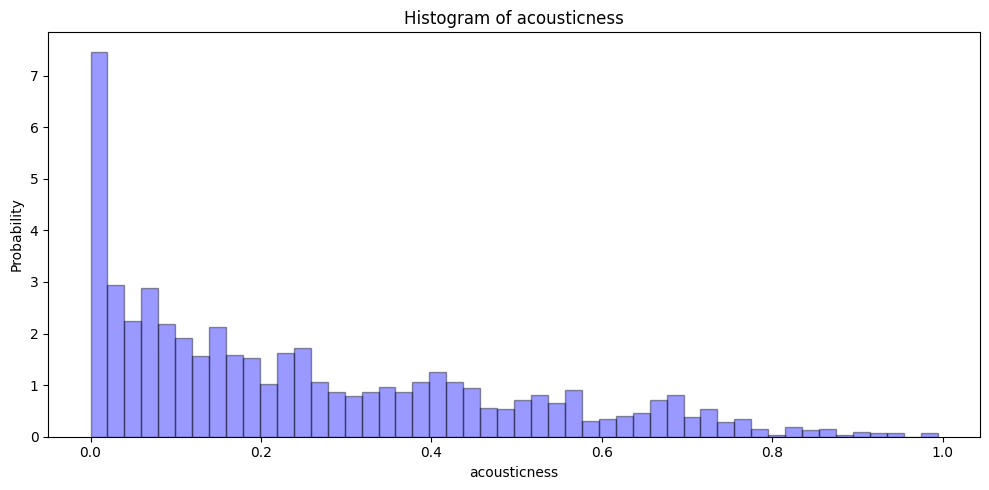

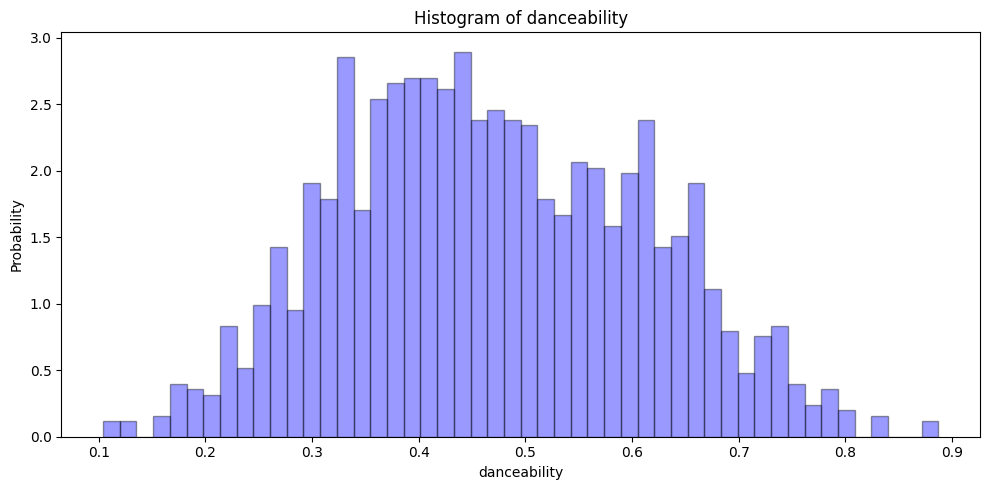

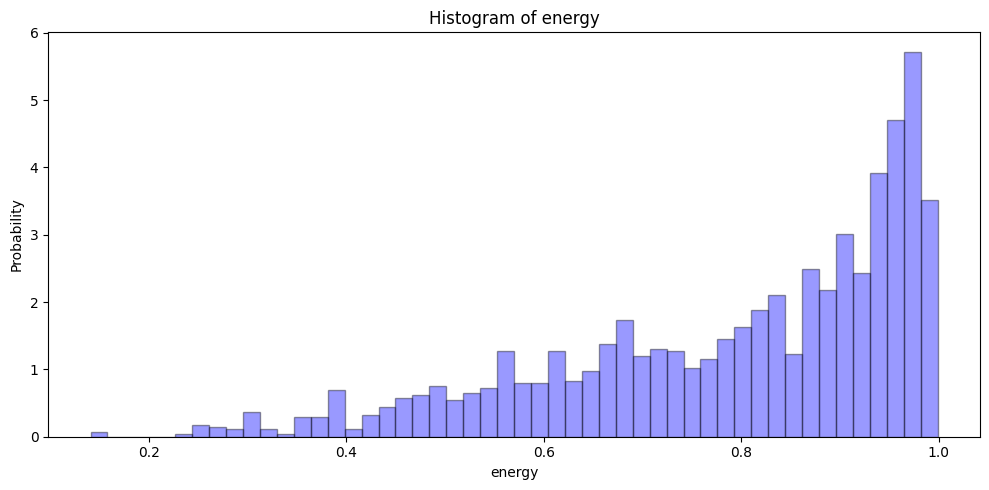

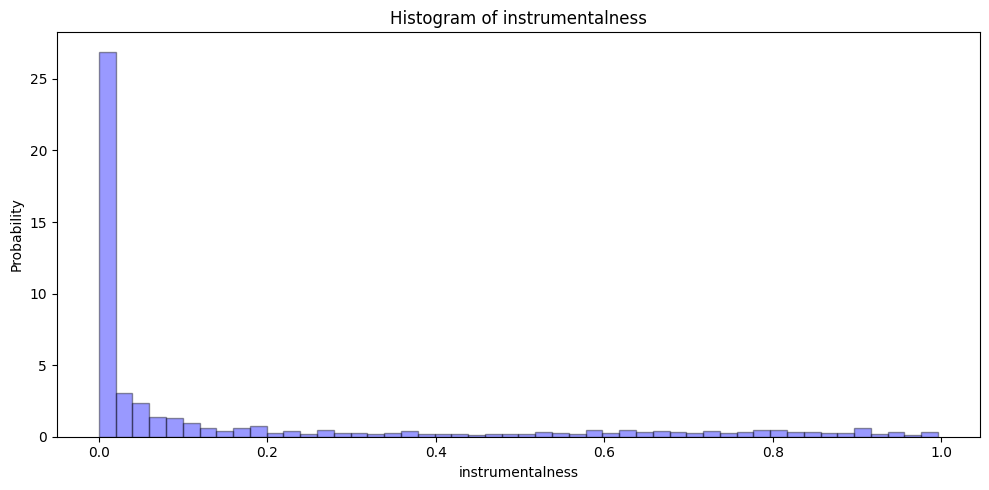

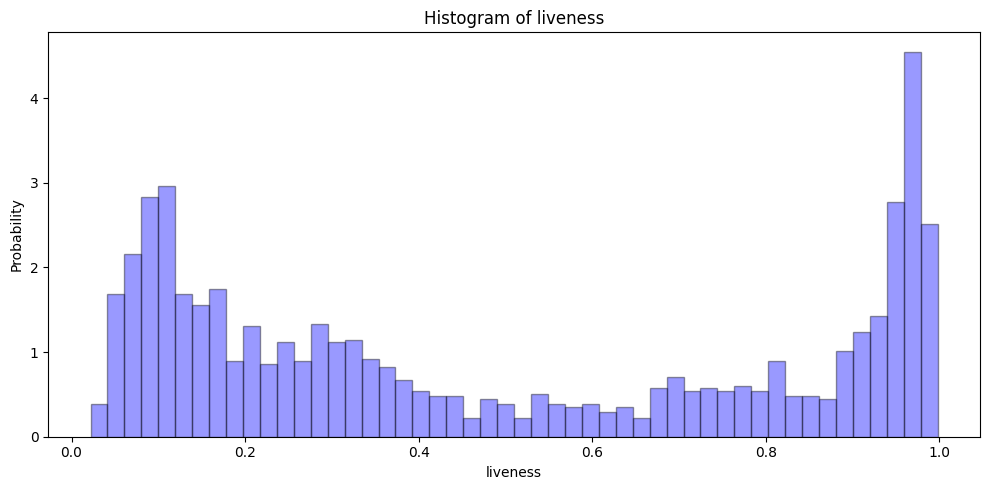

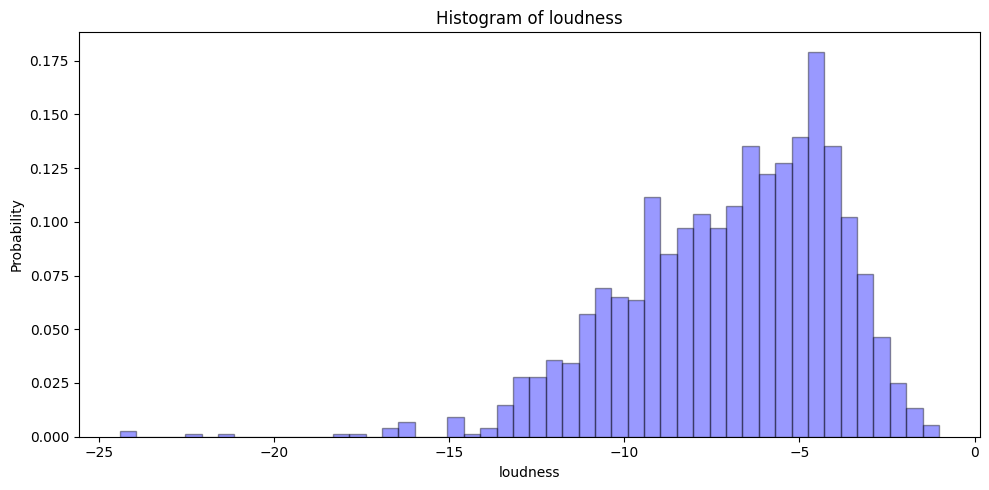

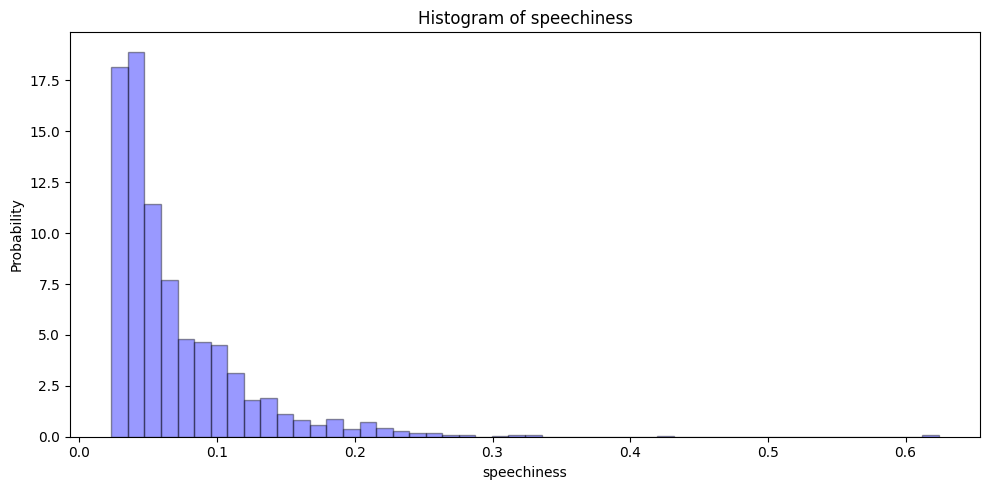

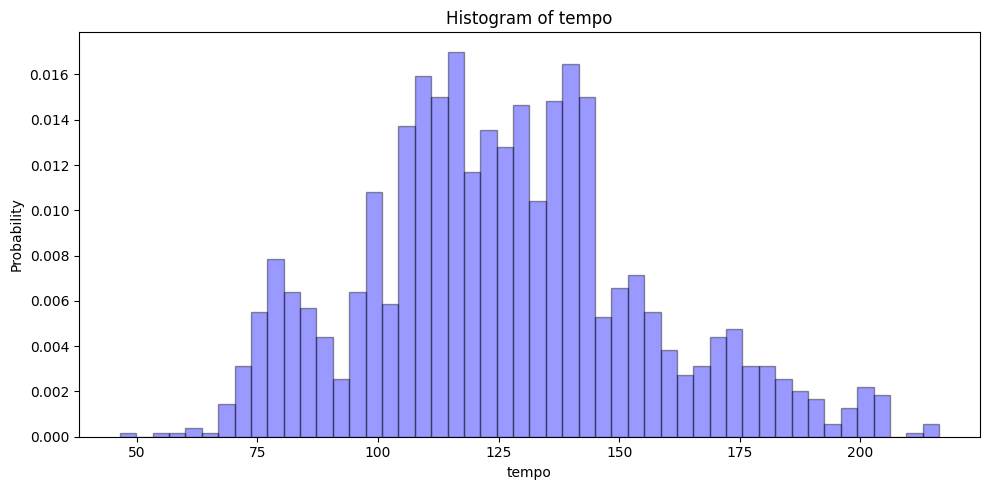

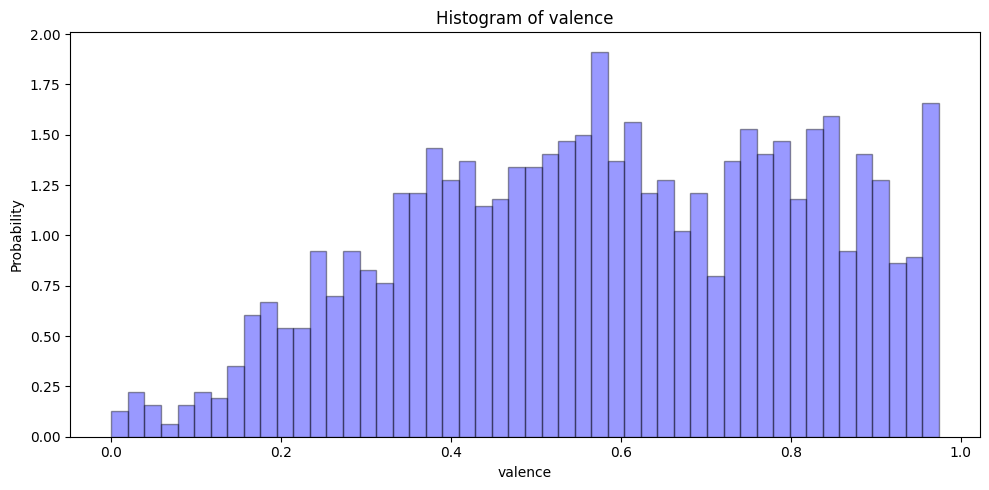

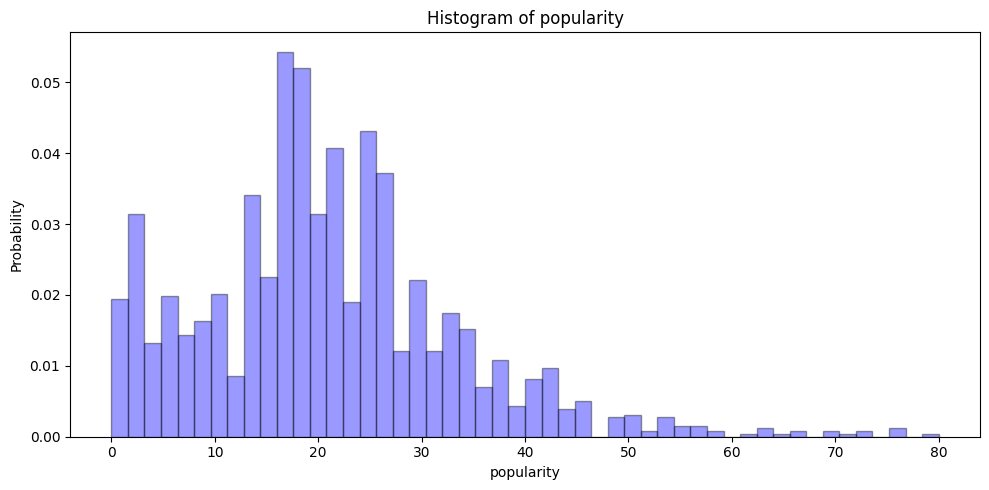

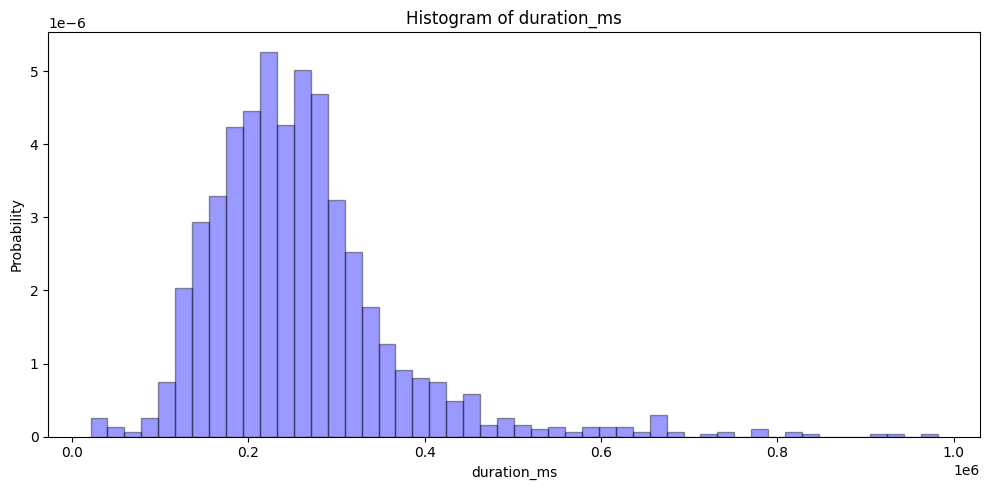

In [58]:
if viewPlots:
    for feature in to_hist_plot:
        fig, axes = plt.subplots(1, 1, figsize=(10, 5))

        axes.hist(x=spotify_df[feature], bins=50, color="blue", edgecolor="black", alpha=0.4, density=True)
        axes.set_title(f"Histogram of {feature}")
        axes.set_xlabel(f"{feature}")
        axes.set_ylabel(f"Probability")

        plt.tight_layout()
        plt.show()

### Top-Two Albums

In [59]:
#Find the two most popular albums by collective popular songs
grouped_albums_by_popularity = (
    spotify_df
    .groupby(by="album")
    .sum("popularity")
    .sort_values(by="popularity", ascending=False)
)
grouped_albums_by_popularity.head()


track_number  acousticness  \
album                                                               
Honk (Deluxe)                                  1128      9.671574   
Tattoo You (Super Deluxe)                       462     11.012900   
Goats Head Soup (Deluxe)                        253      6.662140   
Some Girls (Deluxe Version)                     266     13.816200   
Exile On Main Street (Deluxe Version)           226     11.502060   

                                       danceability  energy  instrumentalness  \
album                                                                           
Honk (Deluxe)                                25.707  38.661          6.725271   
Tattoo You (Super Deluxe)                    20.050  41.727         16.109790   
Goats Head Soup (Deluxe)                     15.797  30.950          9.265615   
Some Girls (Deluxe Version)                  25.106  37.386          8.512990   
Exile On Main Street (Deluxe Version)        12.521  22.658         10.443289   

                                       liveness  loudness  speechiness  \
album                                                                    
Honk (Deluxe)                           14.8288  -236.324       2.2572   
Tattoo You (Super Deluxe)               28.9255  -221.739       4.1007   
Goats Head Soup (Deluxe)                14.7189  -194.461       2.0204   
Some Girls (Deluxe Version)             10.8536  -179.108       2.9588   
Exile On Main Street (Deluxe Version)    9.0773  -149.671       1.1619   

                                          tempo  valence  popularity  \
album                                                                  
Honk (Deluxe)                          5715.625  31.3290        1232   
Tattoo You (Super Deluxe)              5677.156  26.6816        1008   
Goats Head Soup (Deluxe)               4583.429  23.7040         891   
Some Girls (Deluxe Version)            5271.614  30.1080         852   
Exile On Main Street (Deluxe Version)  3448.722  20.1430         839   

                                       duration_ms  
album                                               
Honk (Deluxe)                             12059243  
Tattoo You (Super Deluxe)                 12467581  
Goats Head Soup (Deluxe)                  10391014  
Some Girls (Deluxe Version)                9869078  
Exile On Main Street (Deluxe Version)      6493641

Albums Honk (Deluxe) and Tattoo You (Super Deluxe) are the 2 most popular albums based on the sum total of popularity for their songs respectively. This is a good indicator of any user enjoying the recommendation of these 2 albums.

### Popularity Correlation

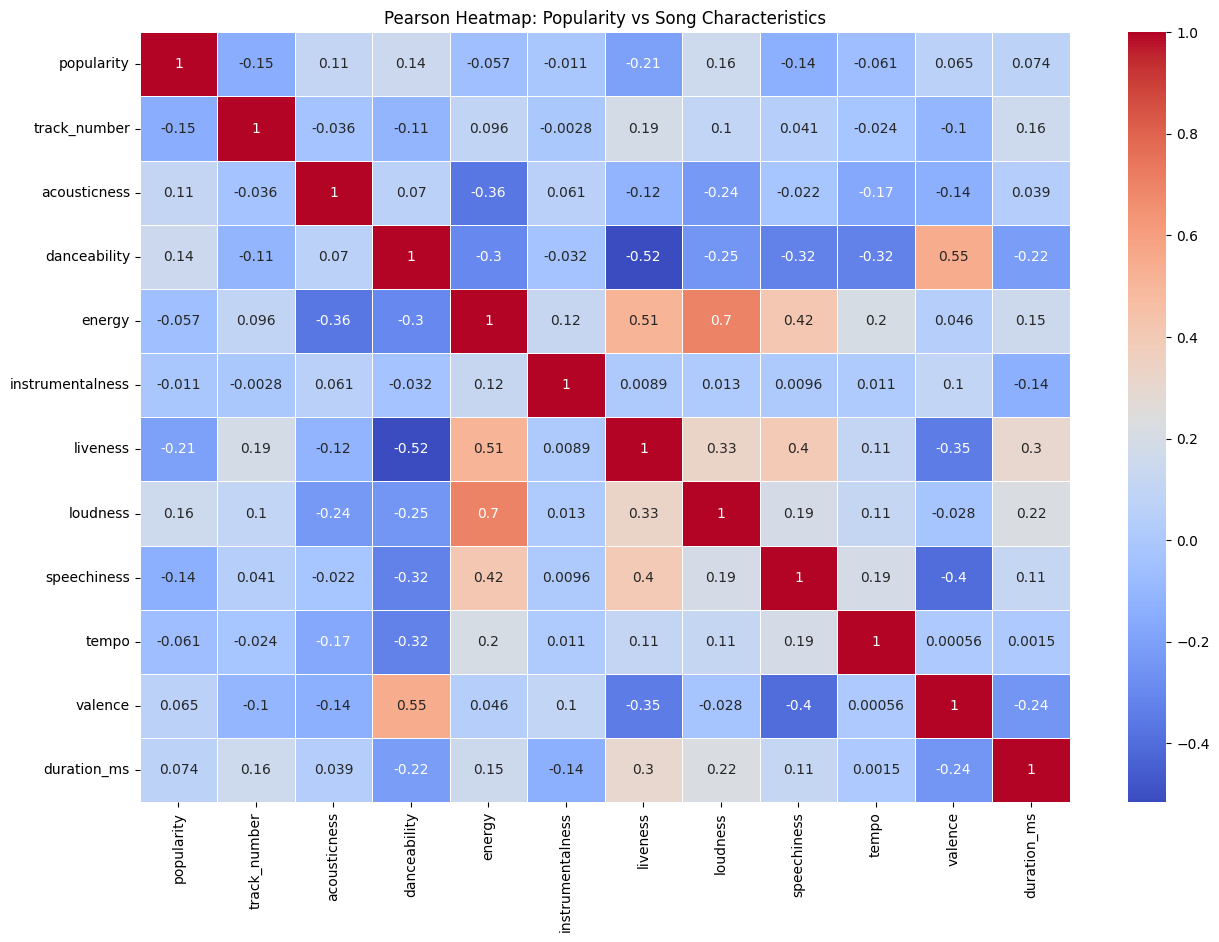

In [60]:
if viewPlots:
    #Investigate popularity vs other features, using pearson correlation
    numerical_features = (
        spotify_df
        .select_dtypes(include=["float64", "int64"])
        .columns
        .drop("popularity")
    )
    pearson_corr = spotify_df[["popularity", *numerical_features]].corr(method="pearson")

    plt.figure(figsize=(15, 10))
    sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Pearson Heatmap: Popularity vs Song Characteristics")
    plt.show()

Looks like popularity has a relatively higher linear relationship with:
- track_number (negative)
- acousticness
- danceability
- liveness (negative)
- loudness
- speechiness (negative)

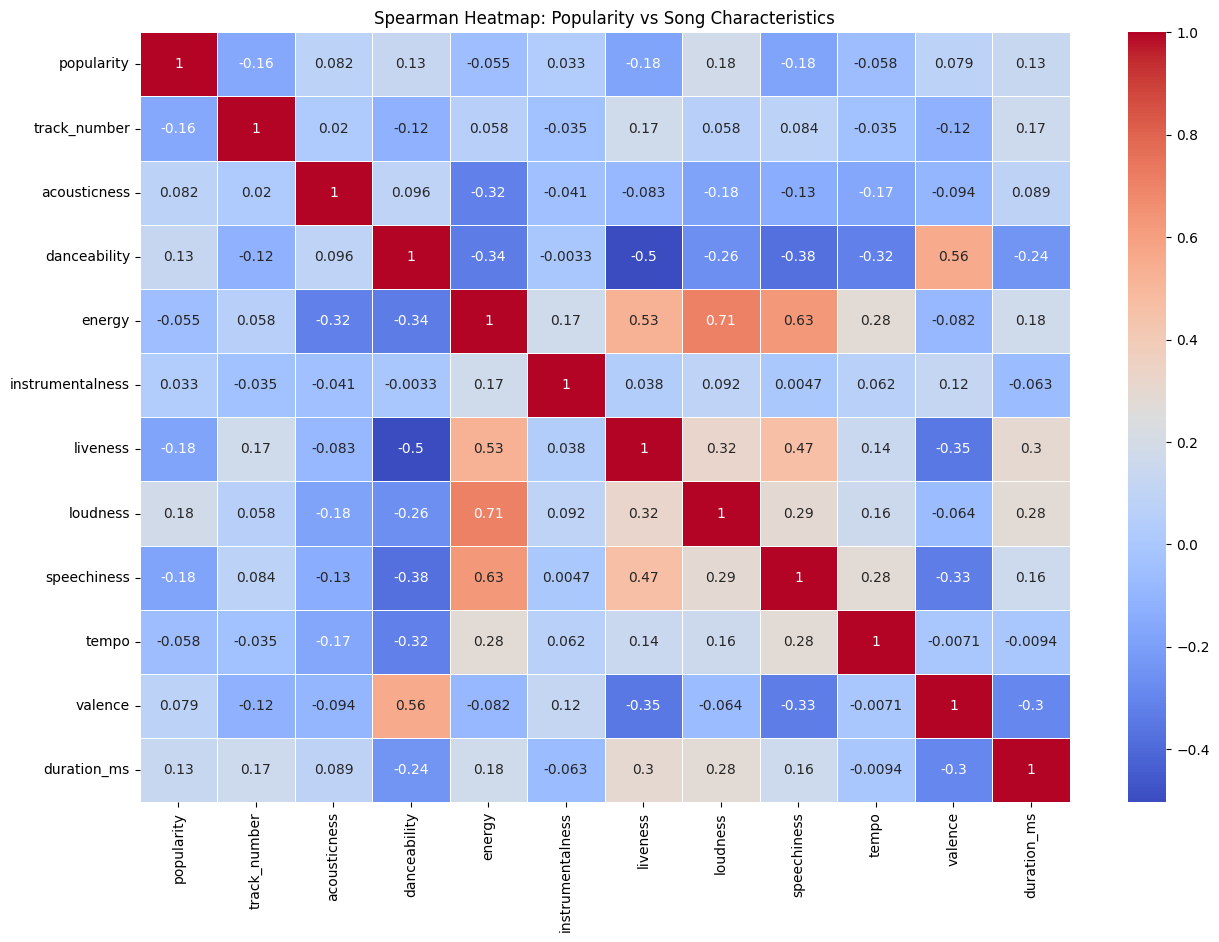

In [61]:
if viewPlots:
    #Investigate popularity vs other features, using spearman correlation
    numerical_features = (
        spotify_df
        .select_dtypes(include=["float64", "int64"])
        .columns
        .drop("popularity")
    )
    spearman_corr = spotify_df[["popularity", *numerical_features]].corr(method="spearman")

    plt.figure(figsize=(15, 10))
    sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Spearman Heatmap: Popularity vs Song Characteristics")
    plt.show()

Looks like popularity has a relatively higher monotonic relationship with:
- track_number (negative)
- danceability
- liveness (negative)
- loudness
- speechiness (negative)
- duration_ms

### Release Date vs Popularity

In [62]:
#Create a sorted release date of all songs in the population
release_date_sorted = spotify_df.iloc[spotify_df["release_date"].sort_values().index].copy(deep=True)
release_date_sorted

name               album  \
1609                                 Walking The Dog  The Rolling Stones   
1598                                        Route 66  The Rolling Stones   
1599  I Just Want To Make Love To You - Mono Version  The Rolling Stones   
1600                                     Honest I Do  The Rolling Stones   
1601                          Mona (I Need You Baby)  The Rolling Stones   
...                                              ...                 ...   
20                                Brown Sugar - Live  Licked Live In NYC   
21                     Sympathy For The Devil - Live  Licked Live In NYC   
22                          Jumpin Jack Flash - Live  Licked Live In NYC   
11                              Thru And Thru - Live  Licked Live In NYC   
0                         Concert Intro Music - Live  Licked Live In NYC   

     release_date  track_number                      id  \
1609   1964-04-16            12  43SkTJJ2xleDaeiE4TIM70   
1598   1964-04-16             1  1FRP8d6l2jm3DS5f78ZrhK   
1599   1964-04-16             2  7j96wehhMtN0fkVvFhD8Ix   
1600   1964-04-16             3  22Bvku5X3odiXj2wbtgY4T   
1601   1964-04-16             4  1o2wswWx1RkkNuVp6Z21HC   
...           ...           ...                     ...   
20     2022-06-10            21  2JMQKVRanp4auj0hGkw3GE   
21     2022-06-10            22  183DVZGxd5Nw5ia0Tv8KOF   
22     2022-06-10            23  7p0sTErcMXc1jJ2Ff4QlcT   
11     2022-06-10            12  1rXa5covpujMsZPzOadZRr   
0      2022-06-10             1  2IEkywLJ4ykbhi1yRQvmsT   

                                       uri  acousticness  danceability  \
1609  spotify:track:43SkTJJ2xleDaeiE4TIM70        0.3830         0.727   
1598  spotify:track:1FRP8d6l2jm3DS5f78ZrhK        0.2960         0.671   
1599  spotify:track:7j96wehhMtN0fkVvFhD8Ix        0.2190         0.657   
1600  spotify:track:22Bvku5X3odiXj2wbtgY4T        0.1510         0.646   
1601  spotify:track:1o2wswWx1RkkNuVp6Z21HC        0.0688         0.695   
...                                    ...           ...           ...   
20    spotify:track:2JMQKVRanp4auj0hGkw3GE        0.4390         0.340   
21    spotify:track:183DVZGxd5Nw5ia0Tv8KOF        0.4240         0.447   
22    spotify:track:7p0sTErcMXc1jJ2Ff4QlcT        0.3130         0.192   
11    spotify:track:1rXa5covpujMsZPzOadZRr        0.6720         0.278   
0     spotify:track:2IEkywLJ4ykbhi1yRQvmsT        0.0824         0.463   

      energy  instrumentalness  liveness  loudness  speechiness    tempo  \
1609   0.934          0.068500    0.0965    -8.373       0.0359  125.275   
1598   0.725          0.000220    0.0889   -10.065       0.0650   85.270   
1599   0.825          0.845000    0.3540    -8.940       0.0980  126.817   
1600   0.374          0.651000    0.2080   -10.706       0.1030   87.593   
1601   0.684          0.000257    0.0981    -9.968       0.1330   99.014   
...      ...               ...       ...       ...          ...      ...   
20     0.989          0.722000    0.9820    -4.734       0.1080  139.361   
21     0.979          0.000022    0.9530    -4.942       0.1140  109.191   
22     0.964          0.538000    0.9680    -4.264       0.0609  138.005   
11     0.651          0.000425    0.8930    -7.024       0.0553   95.853   
0      0.993          0.996000    0.9320   -12.913       0.1100  118.001   

      valence  popularity  duration_ms  
1609   0.9690          35       189186  
1598   0.9560          51       140400  
1599   0.5820          34       137666  
1600   0.4750          31       129800  
1601   0.4270          33       214693  
...       ...         ...          ...  
20     0.1640          25       337600  
21     0.2950          26       409466  
22     0.1910          25       370733  
11     0.3340          27       432360  
0      0.0302          33        48640  

[1610 rows x 17 columns]

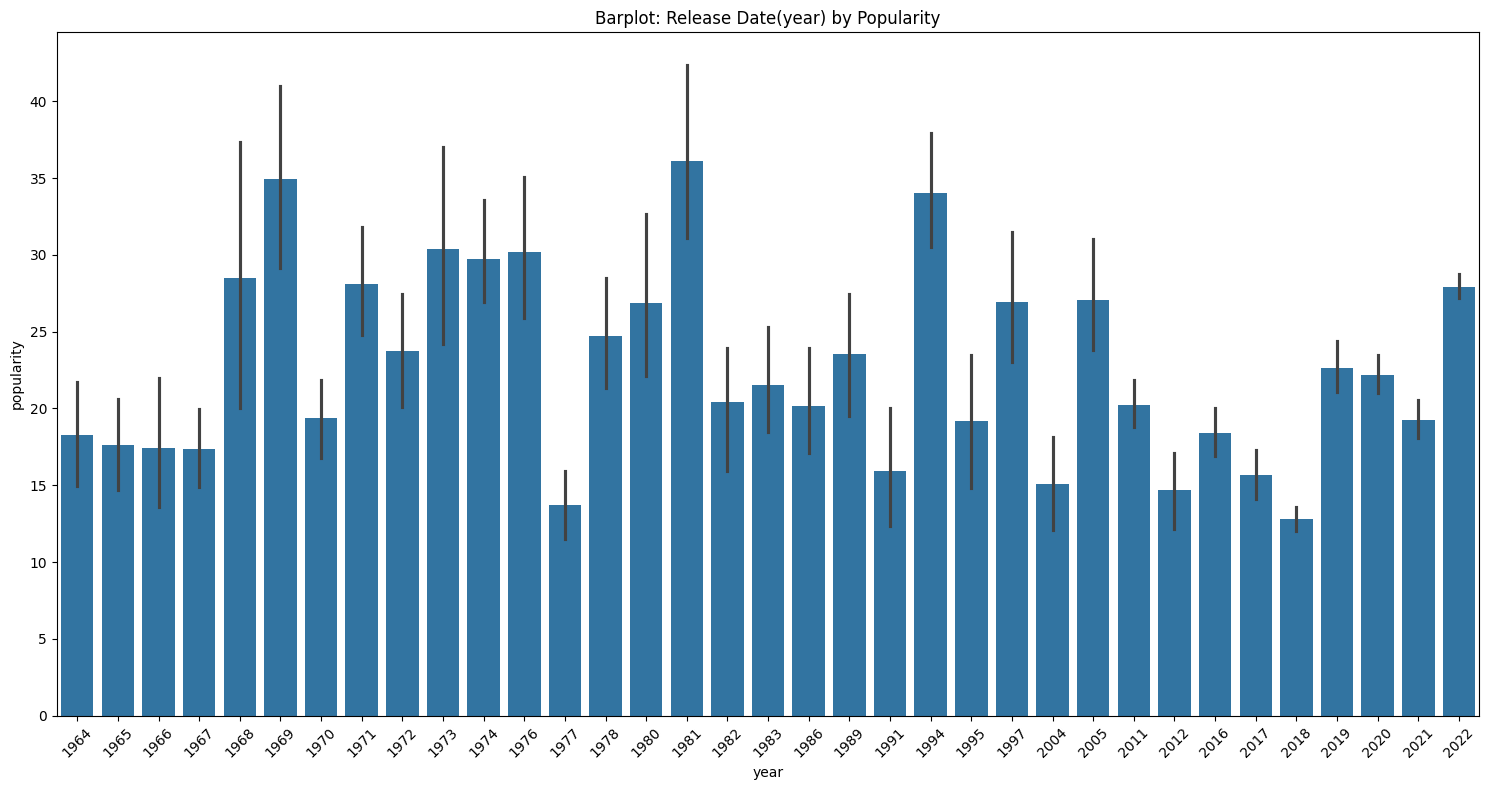

In [63]:
if viewPlots:
    #Visualize if there's a correlation between popularity and time!
    release_date_sorted["year"] = (pd.to_datetime(release_date_sorted["release_date"]).dt.year)
    popularity_per_year = (
        release_date_sorted
        .groupby("year")["popularity"]
        .mean()
    )
    plt.figure(figsize=(15, 8))
    plt.title("Barplot: Release Date(year) by Popularity")
    sns.barplot(data=release_date_sorted, x="year", y="popularity")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

We now have a visual of the most popular times for our population being in the years 1969, 1981, and 1994 with 1981 being the highest.

In [64]:
#Check what years the two most popular albums came out
release_date_sorted[release_date_sorted["album"].isin(["Honk (Deluxe)","Tattoo You (Super Deluxe)"])]

name                      album  \
245                                Rain Fall Down              Honk (Deluxe)   
252                                Just Your Fool              Honk (Deluxe)   
251                           Waiting On A Friend              Honk (Deluxe)   
250                              Emotional Rescue              Honk (Deluxe)   
249         It's Only Rock'n'Roll (But I Like It)              Honk (Deluxe)   
..                                            ...                        ...   
83   Tumbling Dice - Live at Wembley Stadium 1982  Tattoo You (Super Deluxe)   
84   She's So Cold - Live at Wembley Stadium 1982  Tattoo You (Super Deluxe)   
85       Hang Fire - Live at Wembley Stadium 1982  Tattoo You (Super Deluxe)   
86        Miss You - Live at Wembley Stadium 1982  Tattoo You (Super Deluxe)   
82      Little T&A - Live at Wembley Stadium 1982  Tattoo You (Super Deluxe)   

    release_date  track_number                      id  \
245   2019-04-19            13  2rtNvbGFyPcthRNxXw7wEO   
252   2019-04-19            20  4PEamNI5gvkWl9ITQi86x1   
251   2019-04-19            19  0J569qfRzrvr6cxM716sSm   
250   2019-04-19            18  5At4b16uKSp3l3fJUgdee3   
249   2019-04-19            17  45aycSILYZTT5fc7u6nOQx   
..           ...           ...                     ...   
83    2021-10-22            18  4FuwLhBiHFOinjkXyi1GN7   
84    2021-10-22            19  3HylUWQsFpoYy8hUGPQeYa   
85    2021-10-22            20  5OOPWKx9NoFQDLOPjfWKzE   
86    2021-10-22            21  3dAaW8lo0SEpUMdrfmn0Rd   
82    2021-10-22            17  3rZmvRfoboInopoGZ2GsT8   

                                      uri  acousticness  danceability  energy  \
245  spotify:track:2rtNvbGFyPcthRNxXw7wEO       0.00188         0.657   0.844   
252  spotify:track:4PEamNI5gvkWl9ITQi86x1       0.30300         0.533   0.898   
251  spotify:track:0J569qfRzrvr6cxM716sSm       0.15800         0.605   0.776   
250  spotify:track:5At4b16uKSp3l3fJUgdee3       0.12100         0.679   0.627   
249  spotify:track:45aycSILYZTT5fc7u6nOQx       0.43100         0.617   0.960   
..                                    ...           ...           ...     ...   
83   spotify:track:4FuwLhBiHFOinjkXyi1GN7       0.54100         0.446   0.915   
84   spotify:track:3HylUWQsFpoYy8hUGPQeYa       0.21900         0.360   0.952   
85   spotify:track:5OOPWKx9NoFQDLOPjfWKzE       0.22800         0.197   0.979   
86   spotify:track:3dAaW8lo0SEpUMdrfmn0Rd       0.25500         0.509   0.874   
82   spotify:track:3rZmvRfoboInopoGZ2GsT8       0.06070         0.423   0.970   

     instrumentalness  liveness  loudness  speechiness    tempo  valence  \
245           0.00548    0.0638    -6.597       0.0559   98.016    0.528   
252           0.32700    0.2330    -4.465       0.0586  116.193    0.818   
251           0.01910    0.3300    -6.275       0.0282  116.920    0.904   
250           0.07040    0.0379    -5.297       0.0594  113.393    0.785   
249           0.00109    0.1380    -3.971       0.0518  128.396    0.786   
..                ...       ...       ...          ...      ...      ...   
83            0.29600    0.9660    -6.404       0.0975  117.936    0.526   
84            0.67300    0.7360    -6.579       0.1380  168.863    0.618   
85            0.71200    0.9930    -5.800       0.0954  171.766    0.570   
86            0.10400    0.9110    -6.823       0.0498  116.717    0.683   
82            0.05160    0.9750    -6.179       0.1010   78.767    0.463   

     popularity  duration_ms  year  
245          28       294293  2019  
252          22       138386  2019  
251          27       275466  2019  
250          28       340480  2019  
249          28       308173  2019  
..          ...          ...   ...  
83           17       267066  2021  
84           18       250493  2021  
85           17       147106  2021  
86           19       468586  2021  
82           17       201120  2021  

[93 rows x 18 columns]

Interesting to see the 2 most popular albums are in the years 2019 and 2021. Although take notice, they are "deluxe" and "super deluxe" versions, meaning they are re-releases. Honk is a compilation album featuring a lot of their top songs since 1971. Tattoo You is a celebratory album of the 1981 predecessor(highest popularity) with unheard of bonus track "Lost and Found" and a live album from Wembley 1982, and more. This gives a better explanation on why the popularity albums are now and not when they first came out like our graph showed, they are using the best years of their musical catalog. 

### Song Features vs Popularity

In [65]:
#Create grouped popularity dataframe and compare correlating features from our correlation heatmaps
correlating_features = [
    "track_number",     #negative
    "acousticness",     #Derived from pearson
    "danceability",
    "liveness",     #negative
    "loudness",
    "speechiness",      #negative
    "duration_ms"   #Derived from spearman
]

grouped_popularity_avgs = (
        release_date_sorted
        .groupby("popularity")[correlating_features]
        .agg(["mean","median"])
    )

#View the top 5 and bottom 5 popular groups
grouped_popularity_avgs

track_number        acousticness         danceability         \
                   mean median         mean  median         mean median   
popularity                                                                
0              8.882353    7.0     0.186144  0.0508     0.525000  0.497   
1              6.969697    7.0     0.247344  0.1920     0.506212  0.551   
2              6.522727    7.0     0.179499  0.1305     0.542432  0.586   
3              7.486486    8.0     0.168079  0.0723     0.497811  0.502   
4              8.147059    8.5     0.289611  0.1995     0.471882  0.478   
...                 ...    ...          ...     ...          ...    ...   
71             5.000000    5.0     0.670000  0.6700     0.429000  0.429   
72             9.000000    9.0     0.390000  0.3900     0.783000  0.783   
73             1.000000    1.0     0.518000  0.5180     0.702000  0.702   
76             3.000000    1.0     0.176300  0.0436     0.662667  0.634   
80             1.000000    1.0     0.049300  0.0493     0.464000  0.464   

            liveness          loudness        speechiness           \
                mean  median      mean median        mean   median   
popularity                                                           
0           0.412876  0.2380 -9.528824 -8.357    0.065165  0.05540   
1           0.344815  0.2460 -9.073394 -9.049    0.062888  0.04770   
2           0.290011  0.1895 -9.500773 -9.108    0.050905  0.03795   
3           0.318797  0.1640 -8.949297 -9.651    0.058627  0.04570   
4           0.431856  0.3305 -8.334941 -8.603    0.058224  0.04345   
...              ...     ...       ...    ...         ...      ...   
71          0.105000  0.1050 -6.128000 -6.128    0.029100  0.02910   
72          0.042600  0.0426 -3.864000 -3.864    0.030800  0.03080   
73          0.058800  0.0588 -9.237000 -9.237    0.214000  0.21400   
76          0.129933  0.1280 -6.769667 -7.890    0.033400  0.03380   
80          0.399000  0.3990 -9.267000 -9.267    0.092600  0.09260   

              duration_ms            
                     mean    median  
popularity                           
0           174200.470588  151840.0  
1           195840.060606  174600.0  
2           189507.568182  158253.0  
3           193833.459459  174653.0  
4           225624.323529  217146.0  
...                   ...       ...  
71          272000.000000  272000.0  
72          265173.000000  265173.0  
73          378146.000000  378146.0  
76          235550.666667  222813.0  
80          202266.000000  202266.0  

[69 rows x 14 columns]

In [66]:
# Create grouped popularity dataframe and compare correlating features from our correlation heatmaps
correlating_features = [
    "track_number",     #negative
    "acousticness",     #Derived from pearson
    "danceability",
    "liveness",     #negative
    "loudness",
    "speechiness",      #negative
    "duration_ms"   #Derived from spearman
]

# Create a popularity_group feature to read our correlations easier
# Binned by 5 labels since it can be 0-100 labels-> very low, low, mid, high, very high
release_date_sorted["popularity_group"] = pd.cut(
    release_date_sorted["popularity"],
    bins=[0, 20, 40, 60, 80, 100],
    labels=["very low", "low", "mid", "high", "very high"],
    include_lowest=True
)

release_date_sorted.groupby("popularity_group", observed=False)[correlating_features].agg(["mean", "median", "count"])

track_number              acousticness                \
                         mean median count         mean  median count   
popularity_group                                                        
very low             9.566667    8.0   870     0.232306  0.1675   870   
low                  7.891374    7.0   626     0.260839  0.1850   626   
mid                  5.591837    5.0    98     0.323334  0.3105    98   
high                 3.562500    3.0    16     0.386629  0.4255    16   
very high                 NaN    NaN     0          NaN     NaN     0   

                 danceability                liveness                loudness  \
                         mean  median count      mean  median count      mean   
popularity_group                                                                
very low             0.449979  0.4335   870  0.560020  0.6065   870 -7.257517   
low                  0.482529  0.4760   626  0.442680  0.3215   626 -6.634986   
mid                  0.528082  0.5300    98  0.251602  0.1685    98 -6.584020   
high                 0.597938  0.6230    16  0.168319  0.1440    16 -6.970313   
very high                 NaN     NaN     0       NaN     NaN     0       NaN   

                               speechiness                   duration_ms  \
                  median count        mean   median count           mean   
popularity_group                                                           
very low         -6.8500   870    0.078942  0.05955   870  250265.240230   
low              -6.1145   626    0.060090  0.04645   626  269027.544728   
mid              -5.7020    98    0.049155  0.03935    98  248266.969388   
high             -6.3225    16    0.050125  0.03455    16  280223.812500   
very high            NaN     0         NaN      NaN     0            NaN   

                                  
                    median count  
popularity_group                  
very low          235253.0   870  
low               251719.5   626  
mid               245771.5    98  
high              267973.0    16  
very high              NaN     0

Grouped popularity gives us an easier overview of our correlation trends when binned. We can now see the top patterns for the popularity of songs.

The patterns are telling us:
- track_number -> lower track numbers or the first few songs in an album are the most influential songs for determining popularity
- acousticness -> higher acousticness increases with popularity
- danceability -> very strong indicator that higher danceability increases popularity
- liveness -> the less likely a song is being played live the more popular score it gets. This projects users don't prefer live recorded music with such a huge drop in this features magnitude
- loudness -> loudness looks to fluctuate, where popularity increased as it went up but then slightly decreased again on the group "high". This could indicate a hidden threshold where songs that are too loud projects a dislike for the song
- speechiness -> this is a strong indicator as speechiness decreases popularity increases
- duration_ms -> duration fluctuates a bit as well around 250000 ms despite popularity increasing. The most popular songs are slightly longer. This shows consistency for duration of songs which is normal for music, but it also shows the correlation is very weak here, this isn't a strong indicator of what a popular song is.

### Observations Summary
Albums Honk (Deluxe) and Tattoo You (Super Deluxe) are the 2 most popular albums this is a good recommendation for any user of these 2 albums. The 2 most popular albums are in the years 2019 and 2021 even though the most popular year is 1981. They are "deluxe" and "super deluxe" versions. Honk is a compilation album featuring a lot of their top songs since 1971. Tattoo You is a celebratory album of the 1981 predecessor with unheard of bonus track "Lost and Found" and a live album from Wembley 1982, and more. Grouped popularity gives us an easier overview of our correlation trends when binned having the most influential features be; early track_number, acousticness, danceability and speechiness. Looking at the magnitudes of correlations vs popularity it's safe to say some features could be reduced to not having much of an affect on it.

## Feature Engineering
Key Goals:
- Distribution correction with Power Transform
- Scale using StandardScaler
- Find best cluster number using KMeans and silhouette scores
- Test multiple cluster algorithms
- Identify clusters of features
- Identify feature closest neighbors for dimensionality reduction
- Identify cluster differences by labeling songs to their respective neighboring group

In [67]:
release_date_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1610 entries, 1609 to 0
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   name              1610 non-null   object  
 1   album             1610 non-null   object  
 2   release_date      1610 non-null   object  
 3   track_number      1610 non-null   int64   
 4   id                1610 non-null   object  
 5   uri               1610 non-null   object  
 6   acousticness      1610 non-null   float64 
 7   danceability      1610 non-null   float64 
 8   energy            1610 non-null   float64 
 9   instrumentalness  1610 non-null   float64 
 10  liveness          1610 non-null   float64 
 11  loudness          1610 non-null   float64 
 12  speechiness       1610 non-null   float64 
 13  tempo             1610 non-null   float64 
 14  valence           1610 non-null   float64 
 15  popularity        1610 non-null   int64   
 16  duration_ms       1610 non-nu

In [68]:
numerical_features = release_date_sorted.select_dtypes(include=["float64", "int64", "int32"]).columns

In [69]:
cluster_df = release_date_sorted.copy(deep=True)
cluster_df

name               album  \
1609                                 Walking The Dog  The Rolling Stones   
1598                                        Route 66  The Rolling Stones   
1599  I Just Want To Make Love To You - Mono Version  The Rolling Stones   
1600                                     Honest I Do  The Rolling Stones   
1601                          Mona (I Need You Baby)  The Rolling Stones   
...                                              ...                 ...   
20                                Brown Sugar - Live  Licked Live In NYC   
21                     Sympathy For The Devil - Live  Licked Live In NYC   
22                          Jumpin Jack Flash - Live  Licked Live In NYC   
11                              Thru And Thru - Live  Licked Live In NYC   
0                         Concert Intro Music - Live  Licked Live In NYC   

     release_date  track_number                      id  \
1609   1964-04-16            12  43SkTJJ2xleDaeiE4TIM70   
1598   1964-04-16             1  1FRP8d6l2jm3DS5f78ZrhK   
1599   1964-04-16             2  7j96wehhMtN0fkVvFhD8Ix   
1600   1964-04-16             3  22Bvku5X3odiXj2wbtgY4T   
1601   1964-04-16             4  1o2wswWx1RkkNuVp6Z21HC   
...           ...           ...                     ...   
20     2022-06-10            21  2JMQKVRanp4auj0hGkw3GE   
21     2022-06-10            22  183DVZGxd5Nw5ia0Tv8KOF   
22     2022-06-10            23  7p0sTErcMXc1jJ2Ff4QlcT   
11     2022-06-10            12  1rXa5covpujMsZPzOadZRr   
0      2022-06-10             1  2IEkywLJ4ykbhi1yRQvmsT   

                                       uri  acousticness  danceability  \
1609  spotify:track:43SkTJJ2xleDaeiE4TIM70        0.3830         0.727   
1598  spotify:track:1FRP8d6l2jm3DS5f78ZrhK        0.2960         0.671   
1599  spotify:track:7j96wehhMtN0fkVvFhD8Ix        0.2190         0.657   
1600  spotify:track:22Bvku5X3odiXj2wbtgY4T        0.1510         0.646   
1601  spotify:track:1o2wswWx1RkkNuVp6Z21HC        0.0688         0.695   
...                                    ...           ...           ...   
20    spotify:track:2JMQKVRanp4auj0hGkw3GE        0.4390         0.340   
21    spotify:track:183DVZGxd5Nw5ia0Tv8KOF        0.4240         0.447   
22    spotify:track:7p0sTErcMXc1jJ2Ff4QlcT        0.3130         0.192   
11    spotify:track:1rXa5covpujMsZPzOadZRr        0.6720         0.278   
0     spotify:track:2IEkywLJ4ykbhi1yRQvmsT        0.0824         0.463   

      energy  instrumentalness  liveness  loudness  speechiness    tempo  \
1609   0.934          0.068500    0.0965    -8.373       0.0359  125.275   
1598   0.725          0.000220    0.0889   -10.065       0.0650   85.270   
1599   0.825          0.845000    0.3540    -8.940       0.0980  126.817   
1600   0.374          0.651000    0.2080   -10.706       0.1030   87.593   
1601   0.684          0.000257    0.0981    -9.968       0.1330   99.014   
...      ...               ...       ...       ...          ...      ...   
20     0.989          0.722000    0.9820    -4.734       0.1080  139.361   
21     0.979          0.000022    0.9530    -4.942       0.1140  109.191   
22     0.964          0.538000    0.9680    -4.264       0.0609  138.005   
11     0.651          0.000425    0.8930    -7.024       0.0553   95.853   
0      0.993          0.996000    0.9320   -12.913       0.1100  118.001   

      valence  popularity  duration_ms  year popularity_group  
1609   0.9690          35       189186  1964              low  
1598   0.9560          51       140400  1964              mid  
1599   0.5820          34       137666  1964              low  
1600   0.4750          31       129800  1964              low  
1601   0.4270          33       214693  1964              low  
...       ...         ...          ...   ...              ...  
20     0.1640          25       337600  2022              low  
21     0.2950          26       409466  2022              low  
22     0.1910          25       370733  2022    

### PowerTransform

In [70]:
#Create clustering df from a PowerTransform using Yeo-Johnson
transformer = PowerTransformer()

cluster_df_numeric = pd.DataFrame(
    transformer.fit_transform(release_date_sorted[numerical_features]),
    columns=transformer.get_feature_names_out(),
    index=release_date_sorted[numerical_features].index
)
cluster_df_numeric.describe()

track_number  acousticness  danceability        energy  \
count  1.610000e+03  1.610000e+03  1.610000e+03  1.610000e+03   
mean  -3.883712e-16  5.295971e-17  7.061294e-17 -1.059194e-16   
std    1.000311e+00  1.000311e+00  1.000311e+00  1.000311e+00   
min   -1.889335e+00 -1.429655e+00 -2.833135e+00 -2.072648e+00   
25%   -6.731273e-01 -9.119001e-01 -7.364695e-01 -8.850149e-01   
50%    6.600717e-03 -6.590063e-02 -3.877100e-02  1.375325e-01   
75%    6.257723e-01  8.889161e-01  7.863099e-01  9.362864e-01   
max    2.994884e+00  2.010263e+00  2.703416e+00  1.472873e+00   

       instrumentalness      liveness      loudness   speechiness  \
count      1.610000e+03  1.610000e+03  1.610000e+03  1.610000e+03   
mean       1.677057e-16  1.412259e-16 -2.471453e-16  3.177582e-16   
std        1.000311e+00  1.000311e+00  1.000311e+00  1.000311e+00   
min       -8.151494e-01 -1.554468e+00 -3.579928e+00 -1.652319e+00   
25%       -8.114698e-01 -9.835226e-01 -7.702406e-01 -8.618331e-01   
50%       -5.953993e-01 -1.782146e-01 -4.823371e-04 -1.881143e-01   
75%        9.035703e-01  1.127244e+00  7.619292e-01  8.538846e-01   
max        1.808126e+00  1.334164e+00  3.153099e+00  2.104671e+00   

              tempo       valence    popularity   duration_ms          year  
count  1.610000e+03  1.610000e+03  1.610000e+03  1.610000e+03  1.610000e+03  
mean   1.081261e-15  1.588791e-16 -2.647985e-17 -1.235726e-16  1.368815e-17  
std    1.000311e+00  1.000311e+00  1.000311e+00  1.000311e+00  1.179974e-16  
min   -3.416460e+00 -2.324433e+00 -2.308976e+00 -4.792040e+00 -1.387779e-16  
25%   -6.006791e-01 -7.911676e-01 -5.341433e-01 -5.894299e-01 -1.110223e-16  
50%    8.755037e-03 -3.385231e-02  6.682631e-02  7.272596e-03  0.000000e+00  
75%    6.023220e-01  8.429905e-01  5.876753e-01  5.076516e-01  1.387779e-16  
max    2.680007e+00  1.774718e+00  3.475636e+00  4.103868e+00  1.665335e-16

### StandardScaler

In [71]:
#Create clustering df from a StandardScaler
scaler = StandardScaler()

cluster_df_numeric = pd.DataFrame(
    scaler.fit_transform(cluster_df_numeric),
    columns=scaler.get_feature_names_out(),
    index=cluster_df_numeric.index
)
cluster_df_numeric.describe()

track_number  acousticness  danceability        energy  \
count  1.610000e+03  1.610000e+03  1.610000e+03  1.610000e+03   
mean   3.530647e-17  3.530647e-17 -3.530647e-17 -3.530647e-17   
std    1.000311e+00  1.000311e+00  1.000311e+00  1.000311e+00   
min   -1.889335e+00 -1.429655e+00 -2.833135e+00 -2.072648e+00   
25%   -6.731273e-01 -9.119001e-01 -7.364695e-01 -8.850149e-01   
50%    6.600717e-03 -6.590063e-02 -3.877100e-02  1.375325e-01   
75%    6.257723e-01  8.889161e-01  7.863099e-01  9.362864e-01   
max    2.994884e+00  2.010263e+00  2.703416e+00  1.472873e+00   

       instrumentalness      liveness      loudness   speechiness  \
count      1.610000e+03  1.610000e+03  1.610000e+03  1.610000e+03   
mean      -2.647985e-17 -7.061294e-17 -7.061294e-17  7.061294e-17   
std        1.000311e+00  1.000311e+00  1.000311e+00  1.000311e+00   
min       -8.151494e-01 -1.554468e+00 -3.579928e+00 -1.652319e+00   
25%       -8.114698e-01 -9.835226e-01 -7.702406e-01 -8.618331e-01   
50%       -5.953993e-01 -1.782146e-01 -4.823371e-04 -1.881143e-01   
75%        9.035703e-01  1.127244e+00  7.619292e-01  8.538846e-01   
max        1.808126e+00  1.334164e+00  3.153099e+00  2.104671e+00   

             tempo      valence    popularity   duration_ms          year  
count  1610.000000  1610.000000  1.610000e+03  1.610000e+03  1.610000e+03  
mean      0.000000     0.000000 -2.206654e-17  1.765324e-17 -1.412259e-16  
std       1.000311     1.000311  1.000311e+00  1.000311e+00  1.000311e+00  
min      -3.416460    -2.324433 -2.308976e+00 -4.792040e+00 -1.292514e+00  
25%      -0.600679    -0.791168 -5.341433e-01 -5.894299e-01 -1.057220e+00  
50%       0.008755    -0.033852  6.682631e-02  7.272596e-03 -1.160399e-01  
75%       0.602322     0.842990  5.876753e-01  5.076516e-01  1.060435e+00  
max       2.680007     1.774718  3.475636e+00  4.103868e+00  1.295730e+00

### Visualize Scaled Data

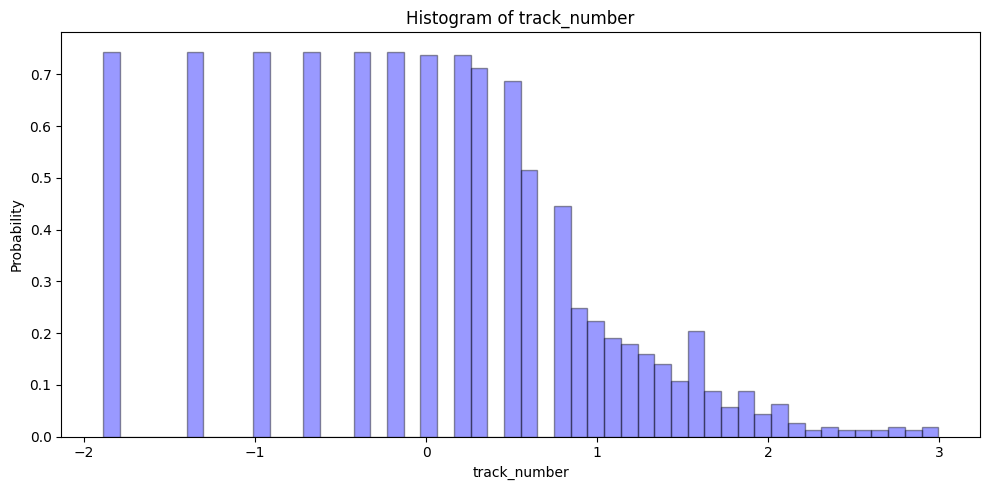

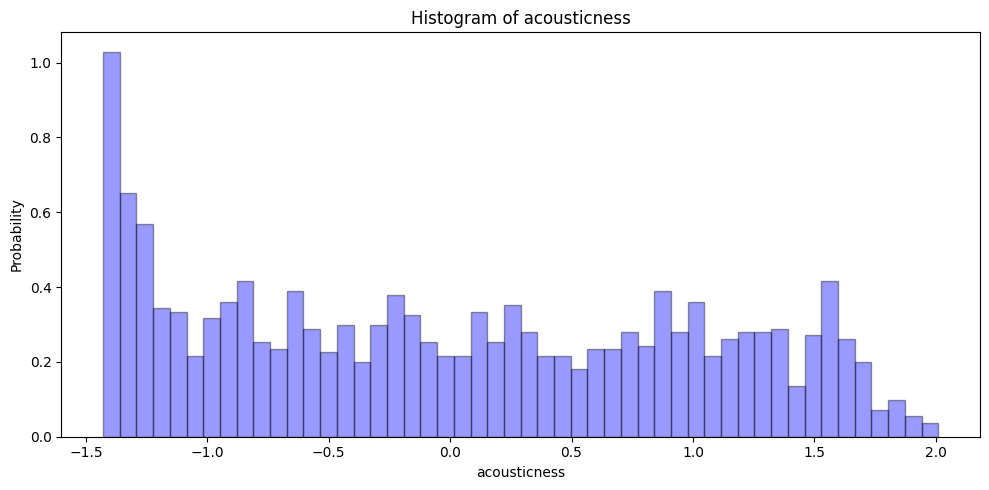

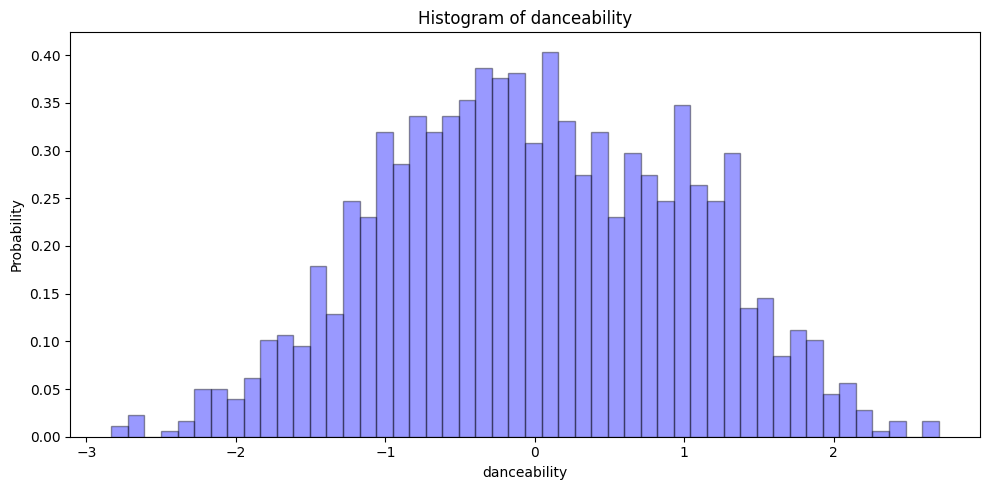

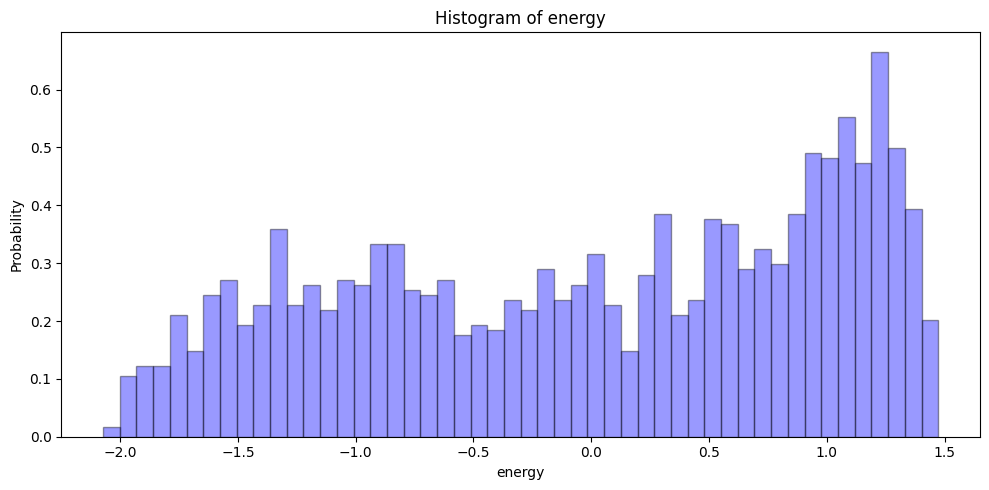

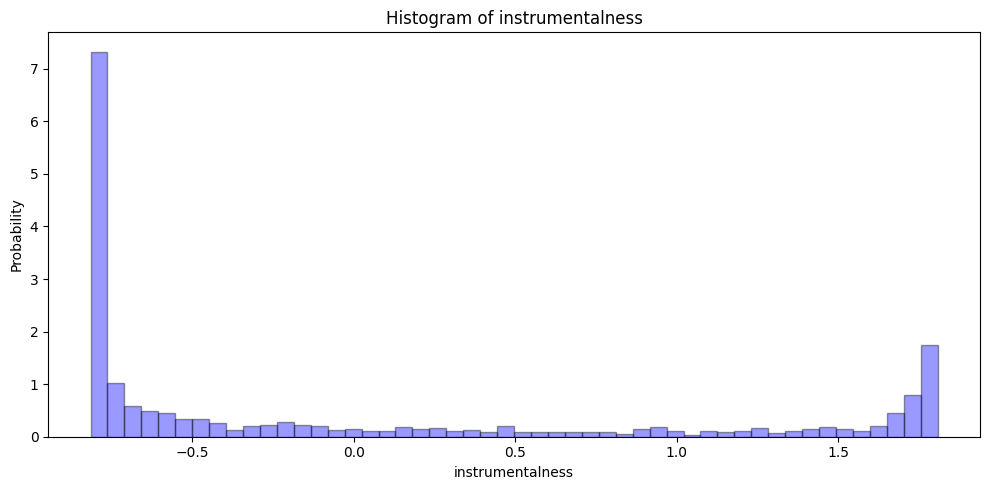

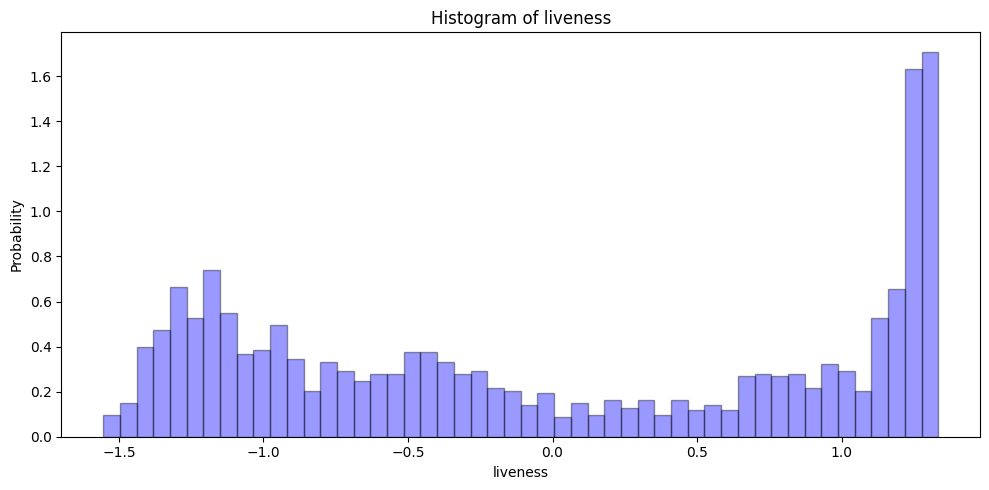

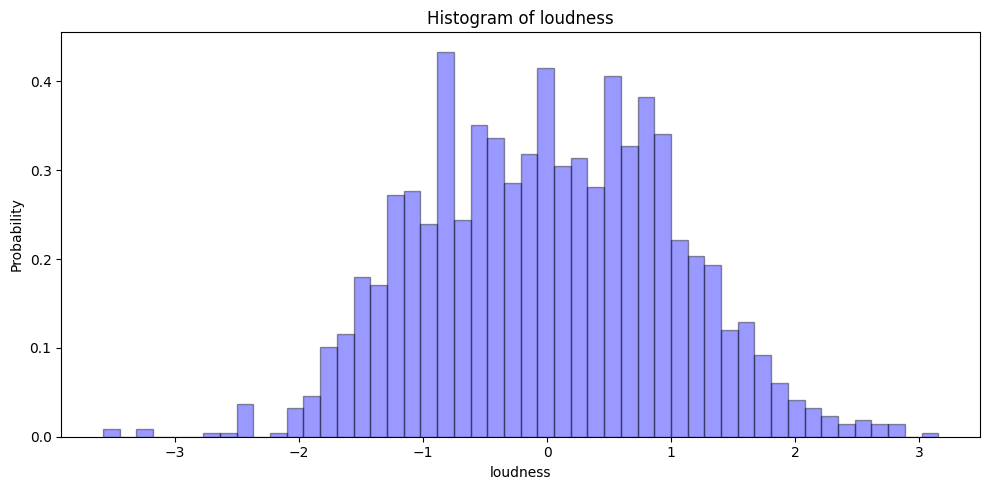

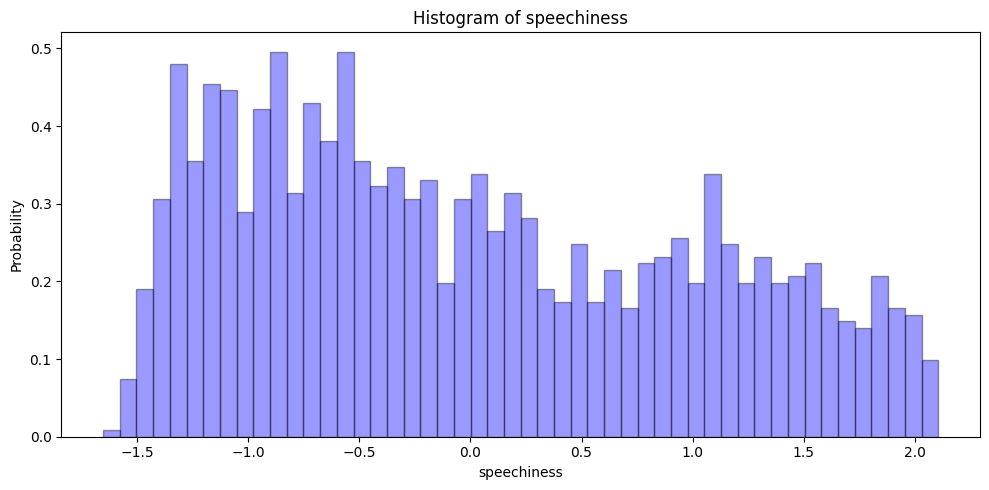

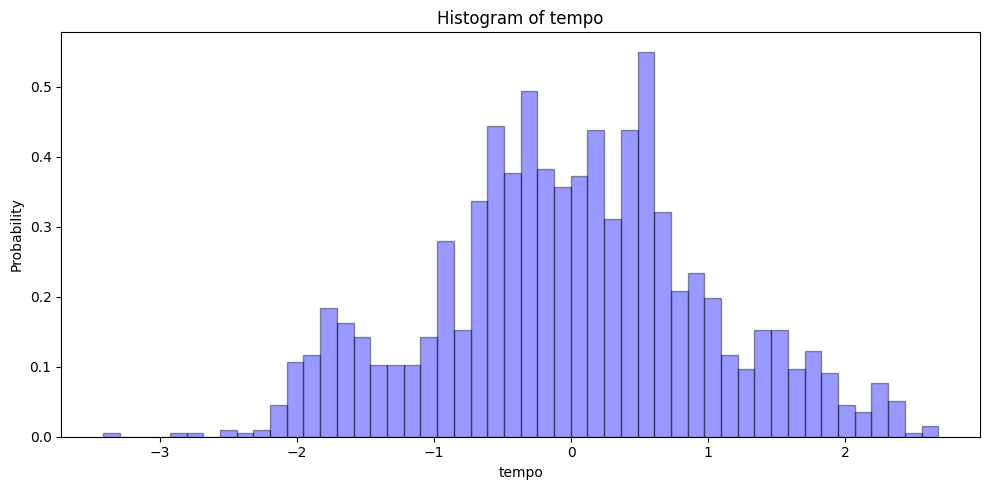

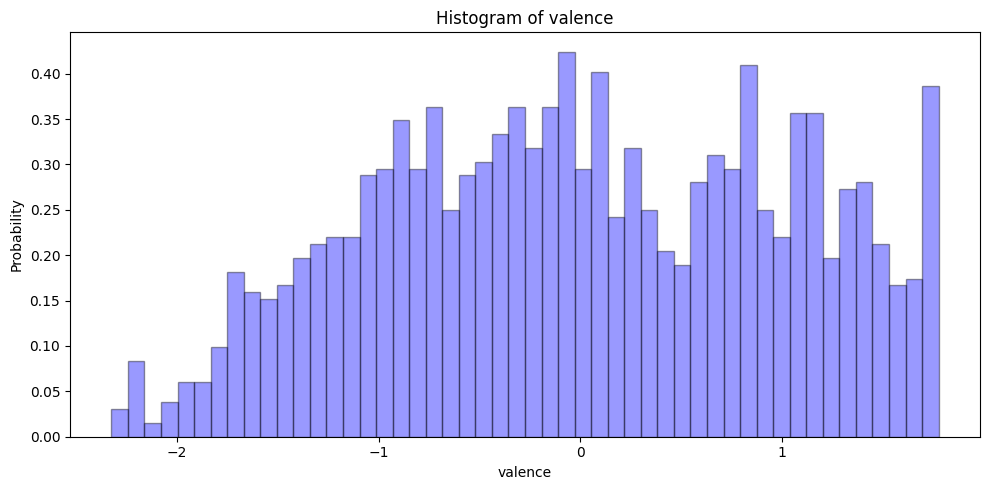

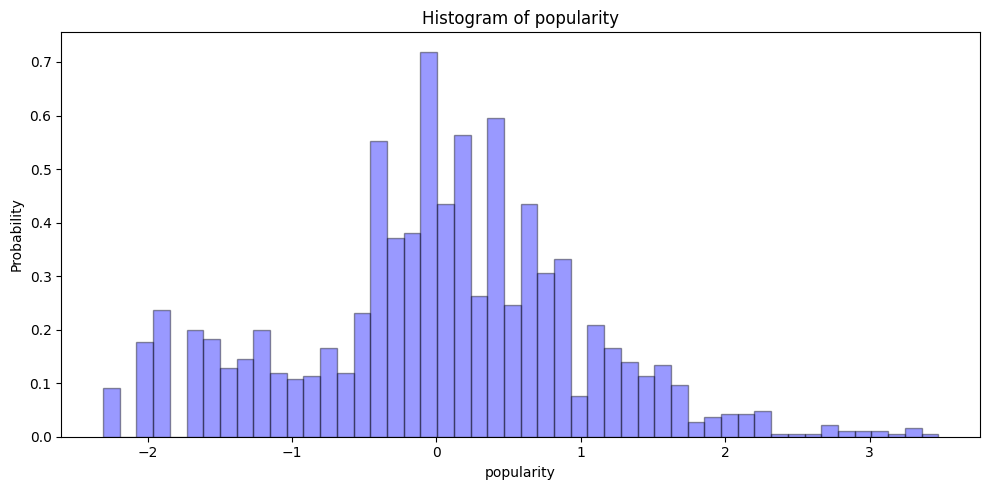

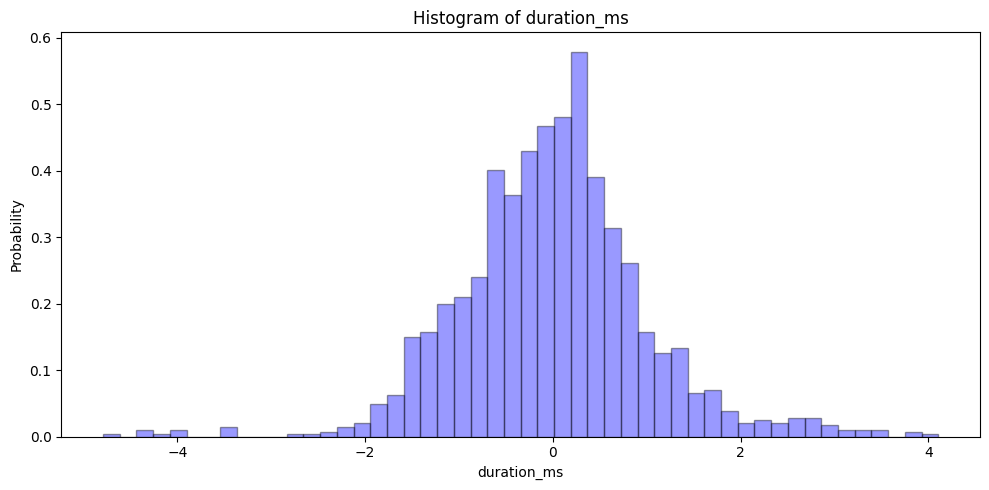

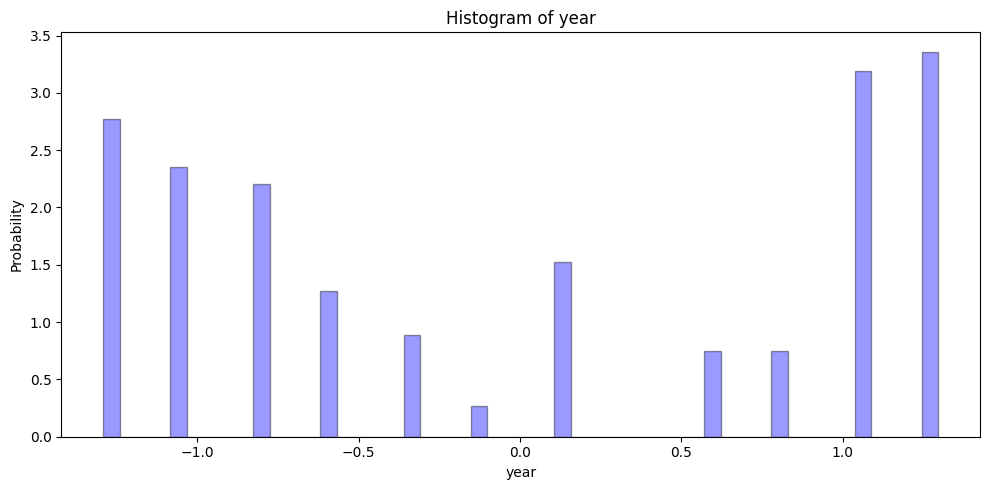

In [72]:
if viewPlots:
    for feature in numerical_features:
        fig, axes = plt.subplots(1, 1, figsize=(10, 5))

        axes.hist(x=cluster_df_numeric[feature], bins=50, color="blue", edgecolor="black", alpha=0.4, density=True)
        axes.set_title(f"Histogram of {feature}")
        axes.set_xlabel(f"{feature}")
        axes.set_ylabel(f"Probability")

        plt.tight_layout()
        plt.show()

### Find best K

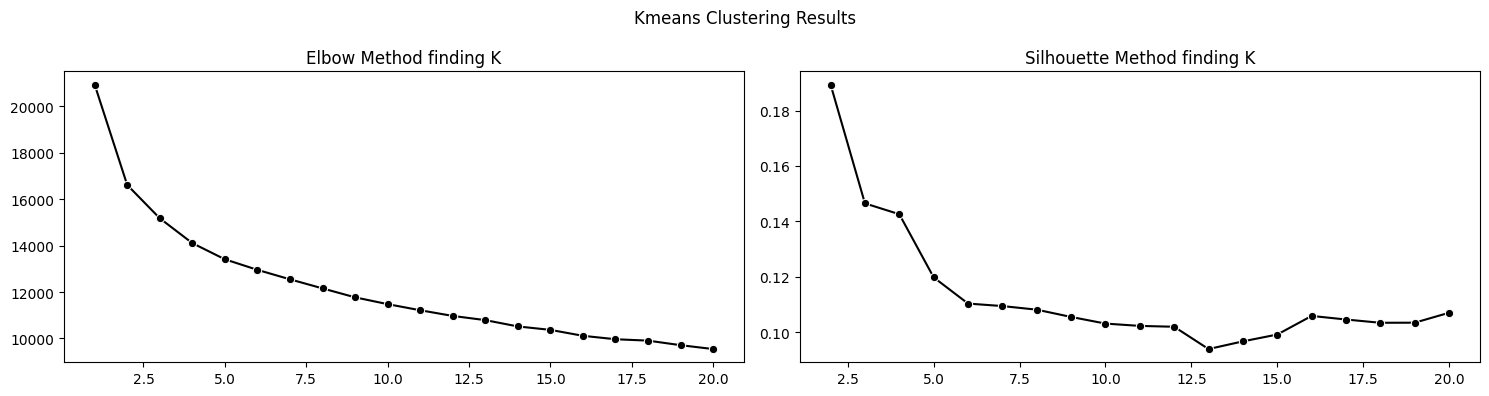

In [73]:
k_range = range(1, 21)
sil_range = range(2, 21)
inertias = []
silhouettes = []


for k in k_range:
    kmeans_model = KMeans(n_clusters=k, random_state=320)
    kmeans_model.fit(cluster_df_numeric)
    inertias.append(kmeans_model.inertia_)

for k in sil_range:
    kmeans_model = KMeans(n_clusters=k, random_state=320)
    labels = kmeans_model.fit_predict(cluster_df_numeric)
    silhouettes.append(silhouette_score(cluster_df_numeric, labels))


if viewPlots:
    fig, axes = plt.subplots(1, 2, figsize=(15,4))

    sns.lineplot(x=k_range, y=inertias, ax=axes[0], marker='o', color="black")
    axes[0].set_title('Elbow Method finding K')
    sns.lineplot(x=sil_range, y=silhouettes, ax=axes[1], marker='o', color="black")
    axes[1].set_title('Silhouette Method finding K')

    fig.suptitle('Kmeans Clustering Results')
    plt.tight_layout()
    plt.show()

The elbow graph is very smooth, at K=2 is the highest drop but the drops are very subtle showing K is interpretable. For silhouette, K = 2 looks to be the most appropriate by score but, seeing a second drop around 5-8 shows something is going on before plateauing. This could be a better indicator of song separations by features. Let's try a few options to see what happens.
- investigate k at 2, 6, and 8

### Cluster Model Scores

In [74]:
k_targets = [2, 6, 8]

#### Kmeans

In [75]:
#Kmeans Clusters
for k in k_targets:
    kmeans_model = KMeans(n_clusters=k, random_state=320)
    kmeans_labels = kmeans_model.fit_predict(cluster_df_numeric)

    kmeans_silhouette_score = silhouette_score(cluster_df_numeric, kmeans_labels)
    print(f"Kmeans silhouette at K={k}: {kmeans_silhouette_score}")

Kmeans silhouette at K=2: 0.1893638913553879
Kmeans silhouette at K=6: 0.11036384728357998
Kmeans silhouette at K=8: 0.10816226969104624


#### Hierarchial Cluster

In [76]:
#Agglomerative Clusters
for k in k_targets:
    agglo_model = AgglomerativeClustering(n_clusters=k)
    agglo_labels = agglo_model.fit_predict(cluster_df_numeric)

    agglo_silhouette = silhouette_score(cluster_df_numeric, agglo_labels)
    print(f"Hierarchial silhouette at K={k}: {agglo_silhouette}")

Hierarchial silhouette at K=2: 0.14954684077447822
Hierarchial silhouette at K=6: 0.0973293363235032
Hierarchial silhouette at K=8: 0.08299211598608368


#### DBScan

In [77]:
#DBScan cluster
# 1.15 - 2 clusters
# 1.32 - 6 clusters
# 1.36 - 8 clusters
dbs_range = [1.15, 1.32, 1.36]
for eps in dbs_range:
    dbscan_model = DBSCAN(eps=eps)
    dbscan_labels = dbscan_model.fit_predict(cluster_df_numeric)

    n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    n_noise = list(dbscan_labels).count(-1)

    print(f"DBScan found {n_clusters} clusters and {n_noise} noise points.")

    mask = dbscan_labels != 1
    dbscan_silhouette = silhouette_score(cluster_df_numeric, dbscan_labels)

    print(f"DBScan silhouette: {dbscan_silhouette}\n")

DBScan found 2 clusters and 1580 noise points.
DBScan silhouette: -0.08462762344739684

DBScan found 8 clusters and 1508 noise points.
DBScan silhouette: -0.23882181020029752

DBScan found 13 clusters and 1477 noise points.
DBScan silhouette: -0.2896407598021761



Looking at the scores of all the cluster algorithms we should use KMeans clustering as the best option. It has the best scores and could find clusters without removing too much as noise unlike the other algorithms. Albeit, the scores are very low, this is indicating a lot of overlap and not CLEAR distinctions between songs, this can be expected from music especially from the same artist/band and genre.

### Dimensionality Reduction
Evaluate the following with clusters = 6:
- Plot range of components with PCA
- Plot feature dimensions with TSNE

In [78]:
# go with 6 clusters since it plateaus in score after and we may find the fluctuation variance that happened 
dim_clusters = 6

#### PCA

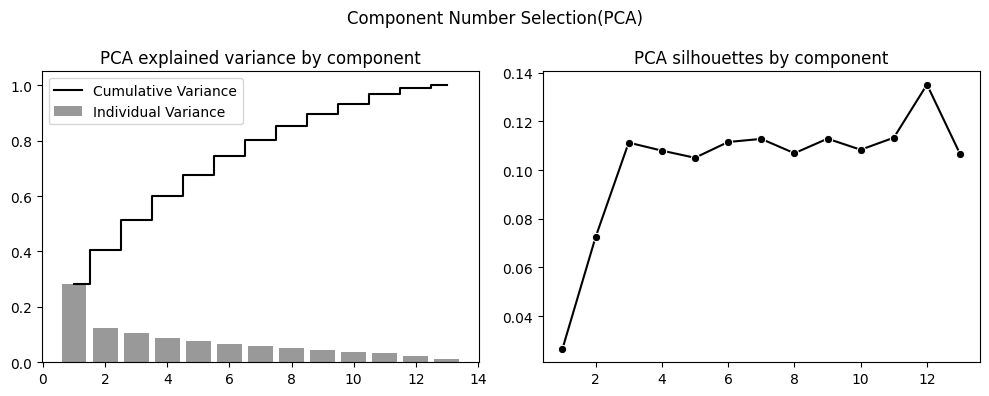

In [79]:
comp_range = range(1, 14)
cumulative_variance = []
silhouettes = []

#PCA
for n_comp in comp_range:
    kmeans_model = KMeans(n_clusters=dim_clusters)

    pca = PCA(n_components=n_comp, random_state=320)
    pca.fit(cluster_df_numeric)
    cumulative_variance.append(np.sum(pca.explained_variance_ratio_))

    kmeans_labels = kmeans_model.fit_predict(pca.transform(cluster_df_numeric))
    silhouettes.append(silhouette_score(cluster_df_numeric, kmeans_labels))


if viewPlots:
    #Plotting
    fig, axes = plt.subplots(1, 2, figsize=(10,4))

    axes[0].bar(x=comp_range, height=pca.explained_variance_ratio_, color="black", alpha=0.4, label="Individual Variance")
    axes[0].step(x=comp_range, y=cumulative_variance, where="mid", color="black", label="Cumulative Variance")
    axes[0].set_title("PCA explained variance by component")
    axes[0].legend(loc="best")
    sns.lineplot(x=comp_range, y=silhouettes, ax=axes[1], marker="o", color="black")
    axes[1].set_title("PCA silhouettes by component")

    plt.suptitle('Component Number Selection(PCA)')
    plt.tight_layout()
    plt.show()

Here PCA with 9 components covers most of our data around .9 variance and has an interesting increase after a dip on 8 components. Let's use this as our representation. Let's visualize this next.

In [80]:
# fig, axes = plt.subplot(projection="3d", figsize=(8, 8))
# cmap = plt.get_cmap("tab10")
# colors = [cmap(i) for i in range(0, 9)]

# for feature, color in zip([0,1], colors):
#     indices = cluster_df == feature

#### T-SNE

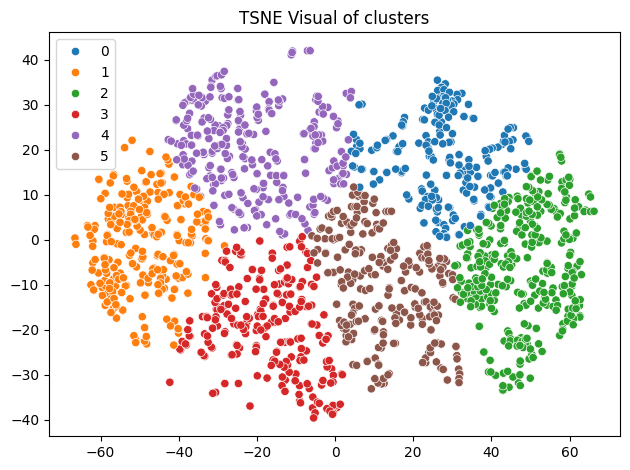

In [81]:
tsne_model = TSNE(n_components=2, random_state=320)
X_tsne = tsne_model.fit_transform(cluster_df_numeric)
kmeans_labels = KMeans(n_clusters=dim_clusters, random_state=320).fit_predict(X_tsne)

if viewPlots:
    plt.title('TSNE Visual of clusters')
    sns.scatterplot(
        x=X_tsne[:, 0],
        y=X_tsne[:, 1],
        hue=kmeans_labels,
        palette='tab10'
    )

    plt.tight_layout()
    plt.show()

### Cluster Labeling
Use our findings and apply:
- KMeans clusters = 6
- PCA components = 9

In [82]:
#Combine k means clustering we found being k=2 and PCA selection we found being pc=5 to get our best cluster
kmeans_model = KMeans(n_clusters=6, random_state=320)
pca = PCA(n_components=9, random_state=320)

best_pca = pca.fit_transform(cluster_df_numeric)
print(f"Shape of PCA: {best_pca.shape}")
best_labels = kmeans_model.fit_predict(pca.transform(cluster_df_numeric))

#Adding back the cluster labels
cluster_df_numeric['cluster'] = best_labels
cluster_df_numeric

Shape of PCA: (1610, 9)


track_number  acousticness  danceability    energy  instrumentalness  \
1609      0.751736      0.819393      1.744527  0.835300          0.094031   
1598     -1.889335      0.487819      1.392336 -0.634241         -0.811457   
1599     -1.368205      0.128493      1.302836 -0.029244          1.786452   
1600     -0.982195     -0.255363      1.232095 -1.790355          1.730117   
1601     -0.673127     -0.828593      1.544398 -0.838617         -0.810837   
...            ...           ...           ...       ...               ...   
20        1.611597      0.999743     -0.904114  1.368206          1.756209   
21        1.686860      0.953658     -0.117053  1.265999         -0.814785   
22        1.759310      0.558195     -2.078906  1.117201          1.666980   
11        0.751736      1.555006     -1.383136 -0.986870         -0.808022   
0        -1.889335     -0.724013     -0.003342  1.409775          1.808126   

      liveness  loudness  speechiness     tempo   valence  popularity  \
1609 -1.218275 -0.595717    -0.893421  0.038623  1.750343    1.119610   
1598 -1.251097 -1.059325     0.298589 -1.481794  1.687115    2.052126   
1599 -0.259668 -0.758365     1.071353  0.091242 -0.038215    1.056048   
1600 -0.769437 -1.219515     1.153803 -1.383586 -0.496905    0.860634   
1601 -1.211405 -1.034411     1.522892 -0.920998 -0.697344    0.991720   
...        ...       ...          ...       ...       ...         ...   
20    1.303363  0.705845     1.229350  0.506389 -1.734050    0.445075   
21    1.246674  0.614934     1.311743 -0.533711 -1.230967    0.516929   
22    1.276137  0.921903     0.166532  0.462565 -1.632588    0.445075   
11    1.125701 -0.172820    -0.030514 -1.045857 -1.076035    0.587675   
0     1.204910 -1.720100     1.257773 -0.214701 -2.219140    0.991720   

      duration_ms      year  cluster  
1609    -0.607377 -1.292514        1  
1598    -1.296856 -1.292514        1  
1599    -1.340791 -1.292514        1  
1600    -1.471141 -1.292514        3  
1601    -0.301424 -1.292514        3  
...           ...       ...      ...  
20       0.863967  1.295730        4  
21       1.396210  1.295730        5  
22       1.119414  1.295730        4  
11       1.550265  1.295730        5  
0       -3.420223  1.295730        4  

[1610 rows x 14 columns]

### Cluster Differences
In this case we don't worry much about the interpretability after scaling of the features for recommending songs. We care about finding similarity, neighbors and ranks.

In [83]:
numerical_features.insert(13, "cluster")

Index(['track_number', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'duration_ms', 'year', 'cluster'],
      dtype='object')

In [84]:
#check the means and medians per cluster
grouped_cluster_summary = (
    cluster_df_numeric
    .groupby("cluster")[numerical_features]
    .agg(["mean", "median", "count"])
)

grouped_cluster_summary

track_number                 acousticness                  \
                mean    median count         mean    median count   
cluster                                                             
0          -0.133179  0.006601   261     0.875685  1.213788   261   
1          -0.443692 -0.414156   243     0.073756  0.138757   243   
2          -0.131025  0.006601   272    -0.665961 -0.902200   272   
3          -0.098329  0.006601   337    -0.119985 -0.230755   337   
4           0.153750  0.183257   277    -0.345679 -0.604816   277   
5           0.767107  0.751736   220     0.322059  0.389991   220   

        danceability                    energy                  \
                mean    median count      mean    median count   
cluster                                                          
0           0.083542 -0.010420   261 -1.229813 -1.329301   261   
1           0.752817  0.746253   243  0.319453  0.425277   243   
2          -0.315970 -0.260594   272  0.601468  0.701902   272   
3           0.789126  0.951932   337 -0.813778 -0.898681   337   
4          -1.032721 -0.972550   277  1.094936  1.176078   277   
5          -0.448487 -0.416683   220  0.230458  0.393269   220   

        instrumentalness                  liveness                  loudness  \
                    mean    median count      mean    median count      mean   
cluster                                                                        
0              -0.367481 -0.776677   261 -0.721824 -0.947559   261 -0.659745   
1               0.646502  0.872817   243 -0.613647 -0.799752   243  0.637811   
2              -0.294852 -0.722748   272  0.218022  0.260041   272  0.547231   
3               0.092863 -0.514177   337 -0.692003 -0.904110   337 -1.023593   
4               0.353563  0.142858   277  1.067544  1.240745   277  0.652589   
5              -0.500998 -0.787686   220  0.980481  1.166593   220  0.147920   

                        speechiness                     tempo                  \
           median count        mean    median count      mean    median count   
cluster                                                                         
0       -0.735613   261   -0.783910 -1.051177   261 -0.543004 -0.567297   261   
1        0.766339   243   -0.461498 -0.631011   243 -0.054794 -0.021197   243   
2        0.529376   272    0.089498  0.026053   272  0.432914  0.417159   272   
3       -1.009572   337   -0.423732 -0.592841   337 -0.115406 -0.189626   337   
4        0.644358   277    1.249304  1.337357   277  0.598052  0.586521   277   
5        0.084958   220    0.405188  0.494375   220 -0.406737 -0.424112   220   

          valence                 popularity                 duration_ms  \
             mean    median count       mean    median count        mean   
cluster                                                                    
0       -0.659658 -0.705623   261   0.607552  0.587675   261    0.183628   
1        0.960518  1.061913   243   0.851300  0.793804   243   -0.021148   
2        0.319986  0.299533   272  -0.141254  0.066826   272   -0.178232   
3        0.659260  0.833739   337  -0.704055 -0.534143   337   -0.831392   
4       -0.893156 -0.906610   277  -0.149936 -0.178461   277    0.172841   
5       -0.559263 -0.672470   220  -0.219168 -0.178461   220    1.081788   

                             year                  
           median count      mean    median count  
cluster                                            
0        0.241619   261 -0.526228 -0.821925   261  
1       -0.029533   243 -0.291301 -0.586630   243  
2       -0.099882   272  0.176349  0.119255   272  
3       -0.844529   337 -0.844267 -1.057220   337  
4        0.189302   277  0.849774  1.060435   277  
5        0.856541   220  0.951343  1.060435   220

#### ViolinPlots
- View cluster distributions not just their means

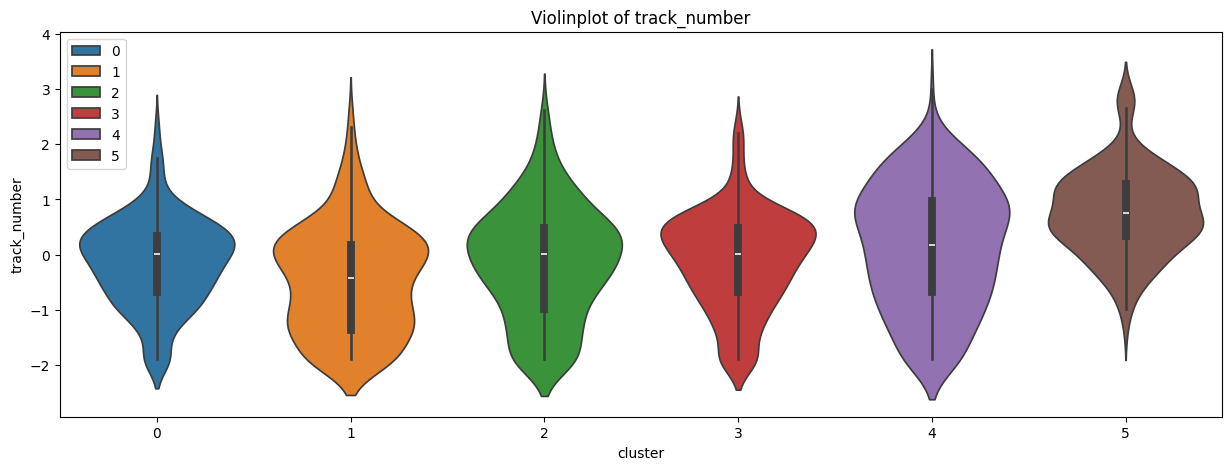

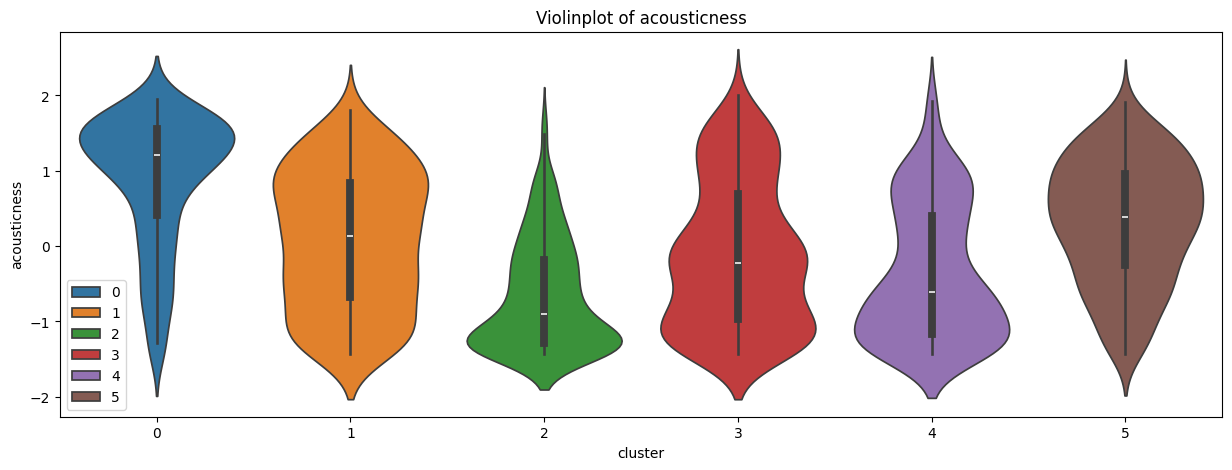

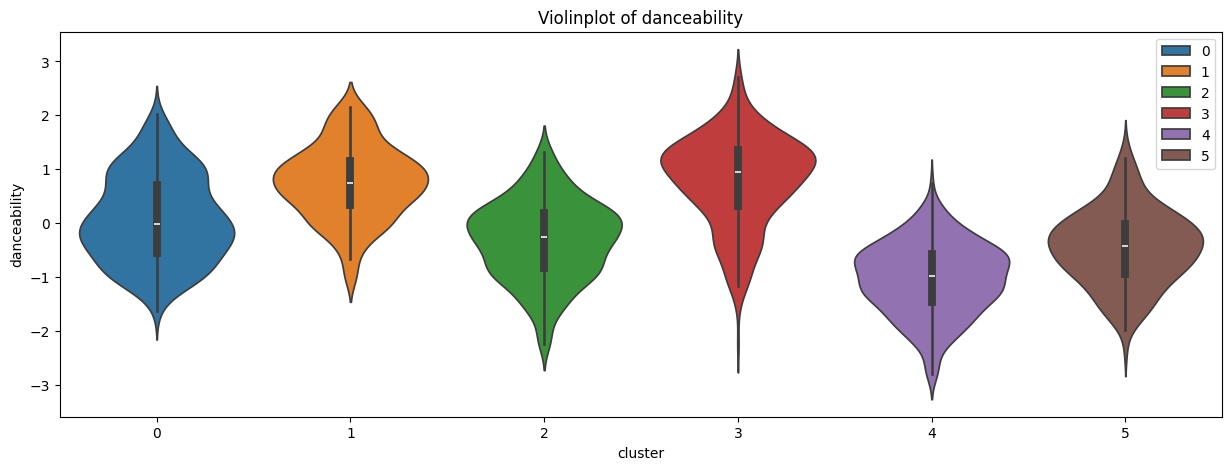

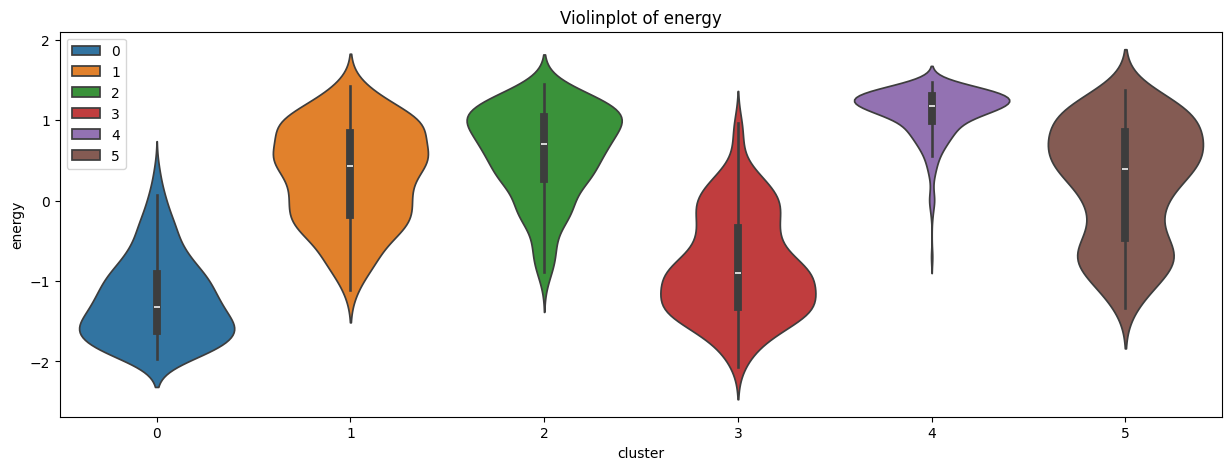

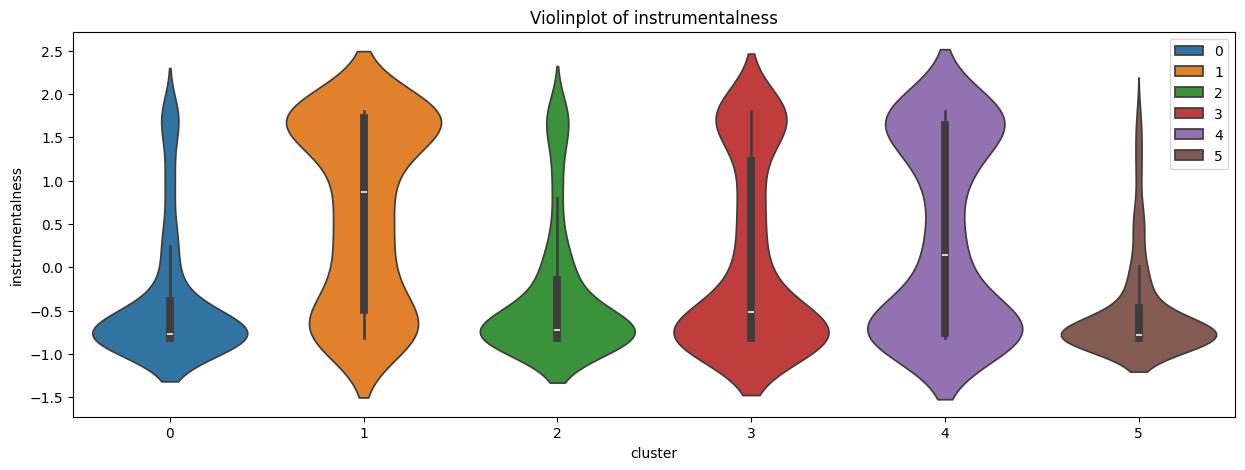

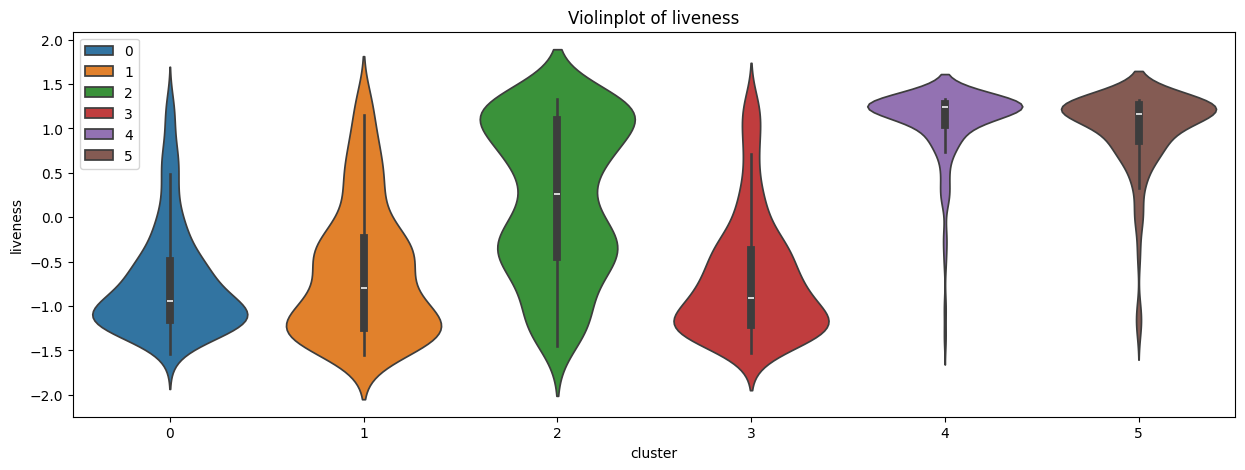

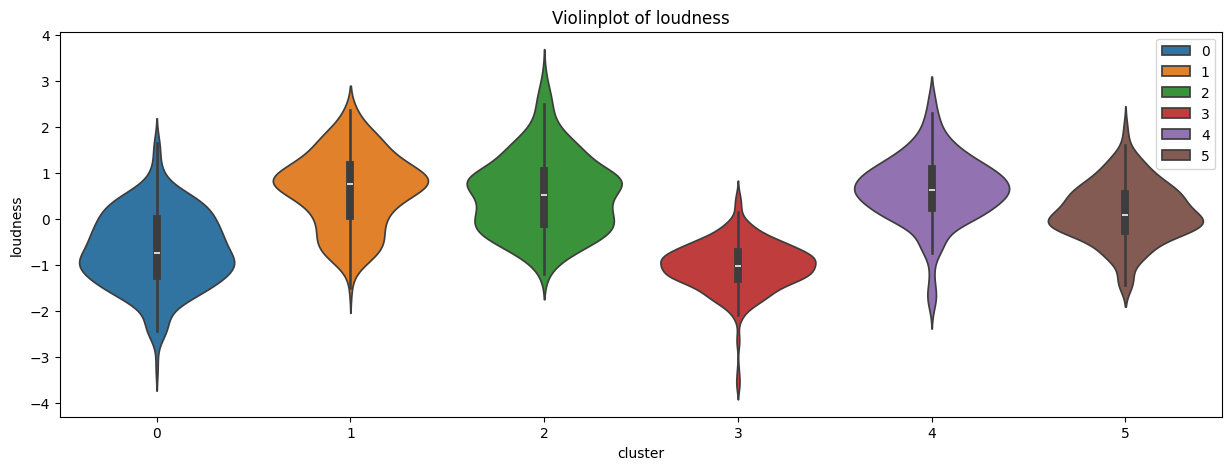

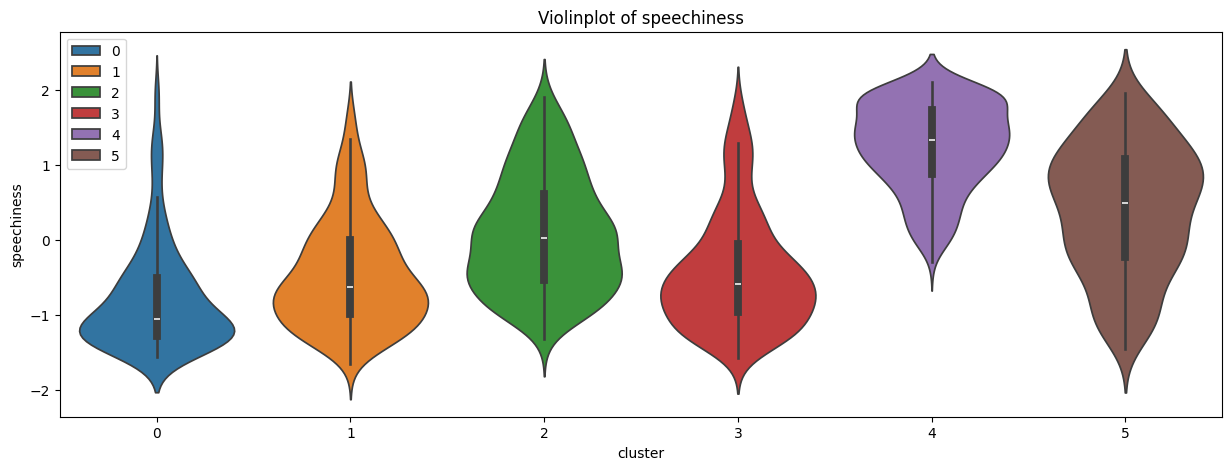

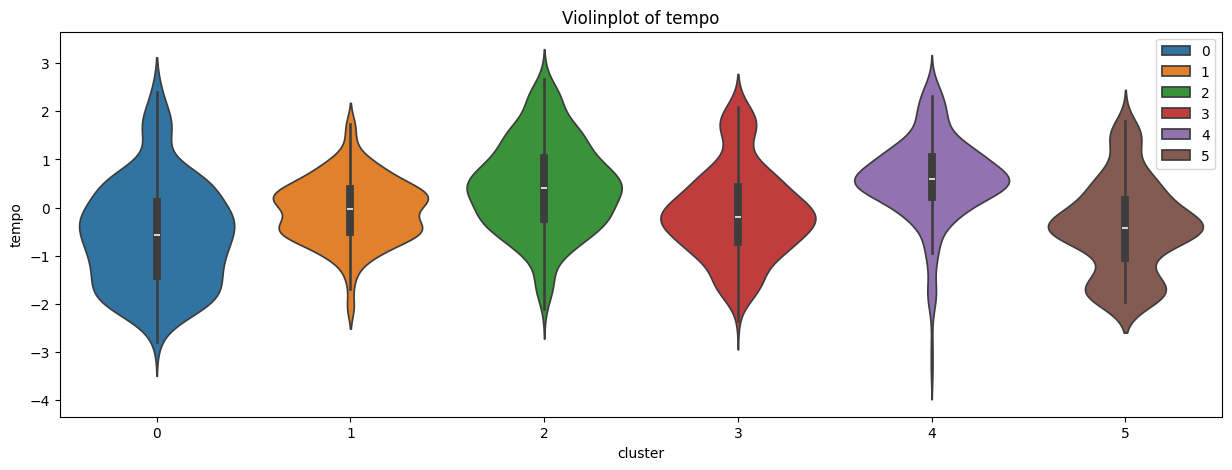

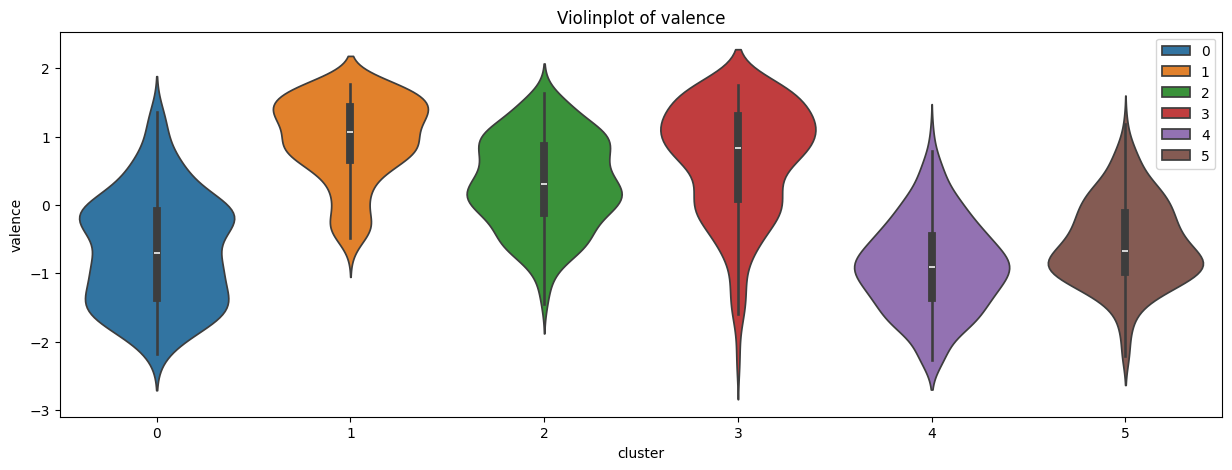

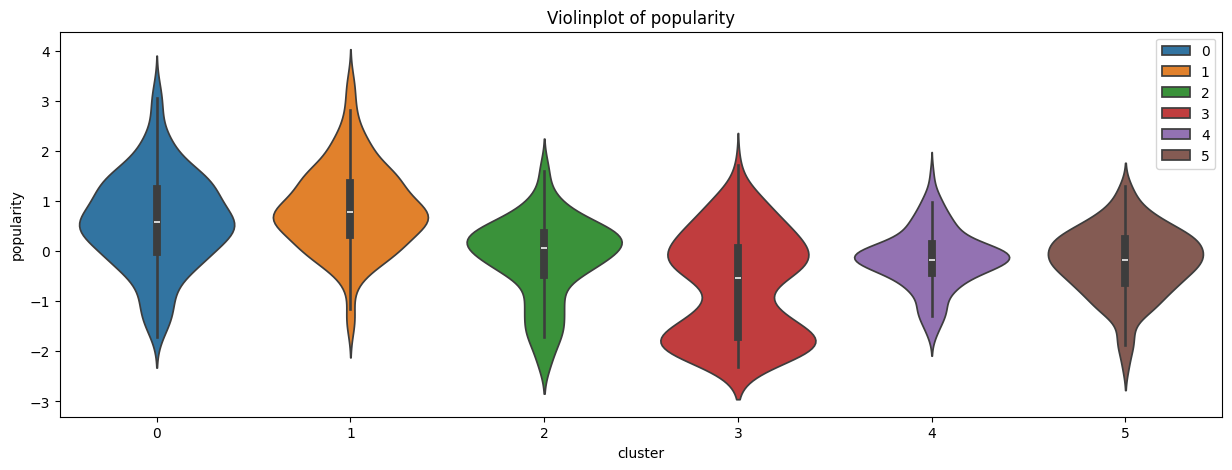

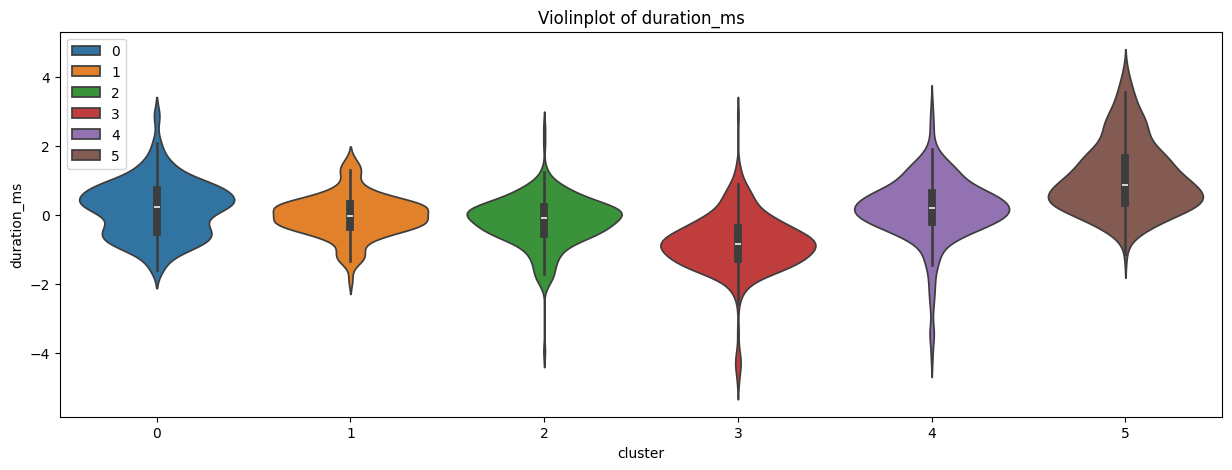

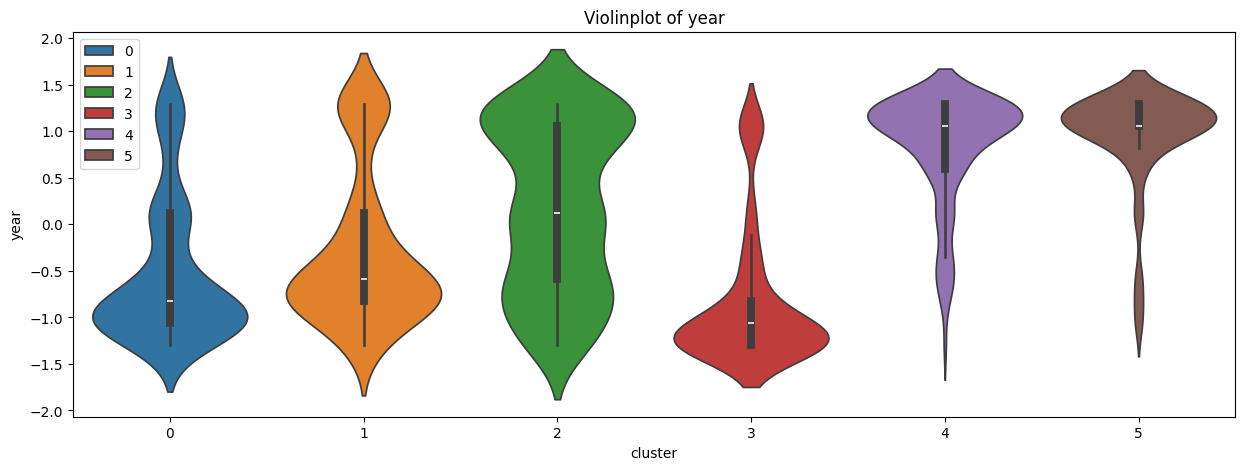

In [85]:
if viewPlots:
    for feature in numerical_features:

        plt.figure(figsize=(15, 5))
        sns.violinplot(data=cluster_df_numeric, x="cluster", y=feature, hue="cluster", palette="tab10")
        plt.title(f"Violinplot of {feature}")
        plt.legend(loc="best")
        plt.show()


#### Heatmap
- We want to create a heatmap to see the magnitudes of cluster means instead of just viewing numbers

In [86]:
cluster_feature_matrix = cluster_df_numeric.pivot_table(
    index="cluster",
    # columns="popularity",
    # values="popularity",
    aggfunc="mean"
)
cluster_feature_matrix

acousticness  danceability  duration_ms    energy  instrumentalness  \
cluster                                                                        
0            0.875685      0.083542     0.183628 -1.229813         -0.367481   
1            0.073756      0.752817    -0.021148  0.319453          0.646502   
2           -0.665961     -0.315970    -0.178232  0.601468         -0.294852   
3           -0.119985      0.789126    -0.831392 -0.813778          0.092863   
4           -0.345679     -1.032721     0.172841  1.094936          0.353563   
5            0.322059     -0.448487     1.081788  0.230458         -0.500998   

         liveness  loudness  popularity  speechiness     tempo  track_number  \
cluster                                                                        
0       -0.721824 -0.659745    0.607552    -0.783910 -0.543004     -0.133179   
1       -0.613647  0.637811    0.851300    -0.461498 -0.054794     -0.443692   
2        0.218022  0.547231   -0.141254     0.089498  0.432914     -0.131025   
3       -0.692003 -1.023593   -0.704055    -0.423732 -0.115406     -0.098329   
4        1.067544  0.652589   -0.149936     1.249304  0.598052      0.153750   
5        0.980481  0.147920   -0.219168     0.405188 -0.406737      0.767107   

          valence      year  
cluster                      
0       -0.659658 -0.526228  
1        0.960518 -0.291301  
2        0.319986  0.176349  
3        0.659260 -0.844267  
4       -0.893156  0.849774  
5       -0.559263  0.951343

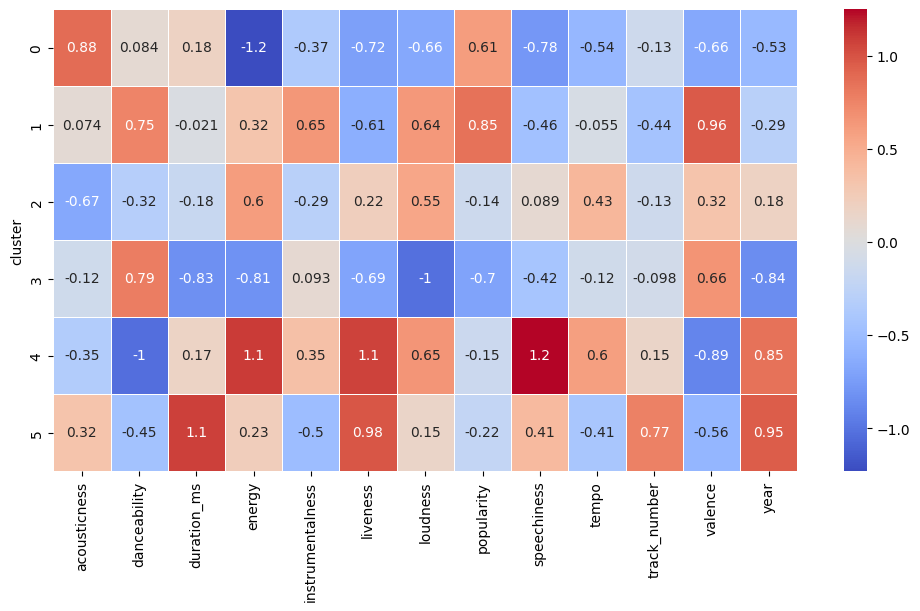

In [87]:
if viewPlots:
    plt.figure(figsize=(12,6))
    sns.heatmap(data=cluster_feature_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.show()

Cluster 0 songs tend to be slower acoustic style songs. Featuring very mellow, low energy, not too loud and not too "speechy".
- Cluster 0 -> Slow Melodic Tracks
    - dominant traits -> acousticness, popularity
    - lacking traits -> energy, speechiness, liveness, loudness, valence

Cluster 1 songs tend to be very popular and upbeat making the listener feel good and up in spirits.
- Cluster 1 -> Popular Upbeat Feel-Good Tracks
    - dominant traits -> valence, popularity, danceability
    - lacking traits -> liveness, speechiness, track_number

Cluster 2 song tend to be very loud, high energy and high BPM songs. Less about dancing and instrument sounds. 
- Cluster 2 -> High-Tempo Productivity Tracks
    - dominant traits -> energy, loudness, tempo
    - lacking traits -> acousticness, danceability, instrumentalness

Cluster 3 songs tend to be very danceable and feel good music. Less about loud music and high energy or high BPM.
- Cluster 3 -> Party Feel-Good Tracks
    - dominant traits -> danceability, valence
    - lacking traits -> loudness, year, duration_ms, energy

Cluster 4 songs tend to be rock and roll heavy live concerts, lots of speaking and high energy. Less about dancing and happiness. Most likely the best of live concerts.
- Cluster 4 -> Rock and Roll Live at Concert Tracks
    - dominant traits -> speechiness, liveness, energy, year
    - lacking traits -> danceability, valence

Cluster 5 songs tend to be longer songs, live concerts, and more recent. Less about happiness, instrument sounds and dancing. These are most likely re-released classics over time.
- Cluster 5 -> Re-released Live Concert Tracks
    - dominant traits -> duration_ms, liveness, year, track_number
    - lacking traits -> valence, instrumentalness, danceability, tempo

#### Spider Plot

In [102]:
radar_features = [
    "acousticness",
    "danceability",
    "energy",
    "instrumentalness",
    "liveness",
    "loudness",
    "speechiness",
    "tempo",
    "valence"
]

cluster_profiles = (
    cluster_df_numeric
    .groupby("cluster")[radar_features]
    .mean()
)

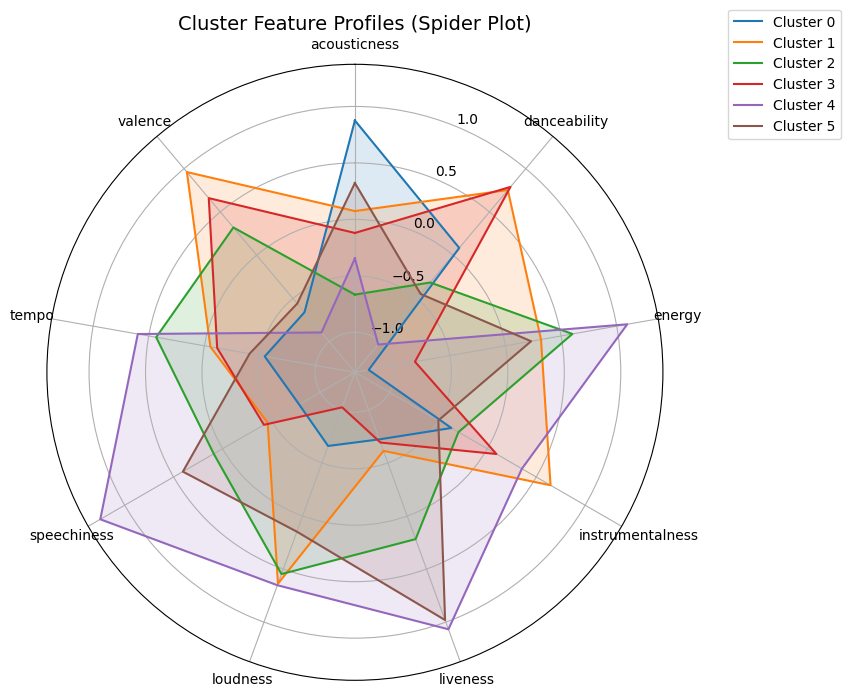

In [108]:
num_vars = len(radar_features)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

fig, ax = plt.subplots(1, 1, figsize=(8, 8), subplot_kw=dict(polar=True))

for cluster_id, row in cluster_profiles.iterrows():
    values = row.tolist()
    values += values[:1]  # close the loop

    ax.plot(angles, values, label=f"Cluster {cluster_id}")
    ax.fill(angles, values, alpha=0.15)

# Axis formatting
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_thetagrids(np.degrees(angles[:-1]), radar_features)
ax.set_title("Cluster Feature Profiles (Spider Plot)", size=14)
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))

plt.show()


### Nearest Song Function
- Create a function to target different songs or give back samples of similar songs 

In [88]:
#Get song similarities to each other (song-song)
#our data is already normalized and scaled
song_cosine_similarity = cosine_similarity(cluster_df_numeric)

song_cosine_similarity_df = pd.DataFrame(
    song_cosine_similarity,
    columns=cluster_df_numeric.index,
    index=cluster_df_numeric.index
)

song_cosine_similarity_df.head(20)

1609      1598      1599      1600      1601      1602      1608  \
1609  1.000000  0.608527  0.405602  0.298717  0.333777  0.604817  0.525111   
1598  0.608527  1.000000  0.599033  0.602905  0.632855  0.593113  0.604942   
1599  0.405602  0.599033  1.000000  0.798218  0.567250  0.597143  0.479090   
1600  0.298717  0.602905  0.798218  1.000000  0.809061  0.634768  0.783753   
1601  0.333777  0.632855  0.567250  0.809061  1.000000  0.364239  0.847347   
1602  0.604817  0.593113  0.597143  0.634768  0.364239  1.000000  0.484742   
1608  0.525111  0.604942  0.479090  0.783753  0.847347  0.484742  1.000000   
1604  0.640314  0.725662  0.515069  0.722030  0.837228  0.677053  0.872765   
1605  0.694215  0.456694  0.302881  0.110153  0.228824  0.363862  0.351600   
1606  0.077151  0.347887  0.273862  0.358515  0.584817  0.109136  0.449383   
1607  0.747489  0.712140  0.470814  0.664986  0.792677  0.504554  0.889002   
1603  0.511217  0.649677  0.526140  0.779323  0.715617  0.764691  0.734914   
1574  0.569256  0.730359  0.817798  0.675583  0.495989  0.867866  0.459639   
1575  0.582527  0.843407  0.548072  0.735058  0.781045  0.585532  0.805230   
1576  0.395905  0.453394  0.853894  0.865246  0.691213  0.551592  0.669887   
1577  0.268403  0.500439  0.730274  0.976553  0.767137  0.624804  0.789692   
1578  0.560875  0.496058  0.543754  0.717250  0.509026  0.898479  0.635191   
1579  0.425888  0.524351  0.464462  0.747159  0.645379  0.742788  0.695193   
1580  0.586770  0.649689  0.473116  0.708174  0.813027  0.653156  0.863372   
1581  0.687116  0.595554  0.324078  0.502198  0.583982  0.576110  0.709903   

          1604      1605      1606      1607      1603      1574      1575  \
1609  0.640314  0.694215  0.077151  0.747489  0.511217  0.569256  0.582527   
1598  0.725662  0.456694  0.347887  0.712140  0.649677  0.730359  0.843407   
1599  0.515069  0.302881  0.273862  0.470814  0.526140  0.817798  0.548072   
1600  0.722030  0.110153  0.358515  0.664986  0.779323  0.675583  0.735058   
1601  0.837228  0.228824  0.584817  0.792677  0.715617  0.495989  0.781045   
1602  0.677053  0.363862  0.109136  0.504554  0.764691  0.867866  0.585532   
1608  0.872765  0.351600  0.449383  0.889002  0.734914  0.459639  0.805230   
1604  1.000000  0.476518  0.448884  0.880804  0.817560  0.680943  0.854479   
1605  0.476518  1.000000  0.253542  0.437309  0.445764  0.470849  0.407615   
1606  0.448884  0.253542  1.000000  0.278376  0.286662  0.208388  0.207850   
1607  0.880804  0.437309  0.278376  1.000000  0.730250  0.488125  0.880984   
1603  0.817560  0.445764  0.286662  0.730250  1.000000  0.695391  0.812505   
1574  0.680943  0.470849  0.208388  0.488125  0.695391  1.000000  0.633656   
1575  0.854479  0.407615  0.207850  0.880984  0.812505  0.633656  1.000000   
1576  0.630258  0.282331  0.130167  0.643528  0.678526  0.663395  0.690919   
1577  0.700765  0.039359  0.273684  0.648168  0.750789  0.613293  0.719192   
1578  0.748090  0.343978 -0.004686  0.641750  0.861450  0.747435  0.717663   
1579  0.761733  0.351176  0.164121  0.673501  0.961386  0.626759  0.796087   
1580  0.980001  0.403353  0.371231  0.860836  0.790006  0.632401  0.858448   
1581  0.753155  0.550245  0.103812  0.811556  0.810621  0.513228  0.832972   

          1576      1577      1578      1579      1580      1581      1583  \
1609  0.395905  0.268403  0.560875  0.425888  0.586770  0.687116  0.697609   
1598  0.453394  0.500439  0.496058  0.524351  0.649689  0.595554  0.622796   
1599  0.853894  0.730274  0.543754  0.464462  0.473116  0.324078  0.409414   
1600  0.865246  0.976553  0.717250  0.747159  0.708174  0.502198  0.633709   
1601  0.691213  0.767137  0.509026  0.645379  0.813027  0.583982  0.752848   
1602  0.551592  0.624804  0.898479  0.742788  0.653156  0.576110  0.479106   
1608  0.669887  0.789692  0.635191  0.695193  0.863372  0.709903  0.873698   
1604  0.630258  0.700765  0.748090  0.761733  0.980001  0.753155  0.852980   
1605  0.282331  0.039359  0.34

In [ ]:
#Create a function to find a song from each cluster to see if they make sense
def get_similar_songs(song_id: str="", uri: str="", name: str="", n_songs: int=5):

    """
    Get similar songs to the selected song given. If none provided get random songs from every cluster. 

    Args:
        param1 (str): an optional spotify song ID
        param2 (str): an optional spotify song URI
        param3 (str): an optional spotify song name
        param4 (int): an optional number of songs to show


    Returns:
        None: prints recommended similar songs

    Raises:
        ValueError: If an invalid value is passed and cannot be found
    """

    #If user Input a spotify song id find similar songs
    if (song_id != ""):
        selected_song_index = cluster_df[cluster_df["id"]==song_id].index.item()

        top_songs = (
            song_cosine_similarity_df
            .loc[selected_song_index]
            .drop(selected_song_index)
            .sort_values(ascending=False)
        )

        mapping_top_songs = (
            cluster_df
            .loc[top_songs.index]
            .drop_duplicates("name", keep=False)
            .head(n_songs)
        )
        mapping_top_songs["similarity"] = top_songs

        print(f"Top Songs for song_id: {song_id}")
        print(f"{mapping_top_songs[["name", "album", "similarity"]]}\n")

    #If user Input a spotify song uri find similar songs
    if (uri != ""):
        selected_song_index = cluster_df[cluster_df["uri"]==uri].index.item()

        top_songs = (
            song_cosine_similarity_df
            .loc[selected_song_index]
            .drop(selected_song_index)
            .sort_values(ascending=False)
        )

        mapping_top_songs = (
            cluster_df
            .loc[top_songs.index]
            .drop_duplicates("name", keep=False)
            .head(n_songs)
        )
        mapping_top_songs["similarity"] = top_songs

        print(f"Top Songs for uri: {song_id}")
        print(f"{mapping_top_songs[["name", "album", "similarity"]]}\n")

    #If user Input a spotify song name find similar songs
    if (name != ""):
        selected_song_index = cluster_df[cluster_df["name"]==name].drop_duplicates("name").index.item()

        top_songs = (
            song_cosine_similarity_df
            .loc[selected_song_index]
            .drop(selected_song_index)
            .sort_values(ascending=False)
        )

        mapping_top_songs = (
            cluster_df
            .loc[top_songs.index]
            .drop_duplicates("name", keep=False)
            .head(n_songs)
        )
        mapping_top_songs["similarity"] = top_songs

        print(f"Top Songs for song named: {song_id}")
        print(f"{mapping_top_songs[["name", "album", "similarity"]]}\n")


    #If user didn't Input anything get random songs per cluster and find similar songs
    if(song_id == "" and uri == "" and name == ""):
        # Print randomly selected songs from each cluster for user
        a_song_per_cluster = (
            cluster_df_numeric
            .groupby("cluster")
            .sample(1)
        )
        mapped_songs = (
                cluster_df.loc[a_song_per_cluster.index]
        )

        #Loop through each cluster returned for similar songs
        for cluster_num in a_song_per_cluster["cluster"].unique():

            top_songs = (
                song_cosine_similarity_df
                .loc[a_song_per_cluster.iloc[cluster_num].name]
                .drop(a_song_per_cluster.iloc[cluster_num].name)
                .sort_values(ascending=False)
            )
            mapping_top_songs = (
                cluster_df
                .loc[top_songs.index]
                .drop_duplicates("name", keep=False)
                .head(n_songs)
            )

            mapping_top_songs["similarity"] = top_songs
            mapping_top_songs["cluster"] = a_song_per_cluster.iloc[cluster_num]["cluster"]

            print(f"Top Songs for: {mapped_songs.iloc[cluster_num]["name"]} in cluster {cluster_num}")
            print(f"{mapping_top_songs[["name", "album","year","track_number","similarity","popularity"]]}\n")

#Find selected songs or songs from every cluster to see similar songs to compare
# get_similar_songs(song_id="0Y4rp0g8SaigDEbyMLfKRy", uri="spotify:track:7p0sTErcMXc1jJ2Ff4QlcT")
get_similar_songs(song_id="")

997


IndexError: single positional indexer is out-of-bounds

In [103]:
a_song_per_cluster = (
            cluster_df_numeric
            .groupby("cluster")
            .sample(1)
        )
a_song_per_cluster.iterrows()

<generator object DataFrame.iterrows at 0x000002231C360590>

### Final DF Creation

In [90]:
#merge transformed cluster_df and cluster_df_numeric for cluster label and ID 
final_df = (cluster_df.merge(cluster_df_numeric, left_index=True, right_index=True, suffixes=("", "_transformed")))
final_df

name               album  \
1609                                 Walking The Dog  The Rolling Stones   
1598                                        Route 66  The Rolling Stones   
1599  I Just Want To Make Love To You - Mono Version  The Rolling Stones   
1600                                     Honest I Do  The Rolling Stones   
1601                          Mona (I Need You Baby)  The Rolling Stones   
...                                              ...                 ...   
20                                Brown Sugar - Live  Licked Live In NYC   
21                     Sympathy For The Devil - Live  Licked Live In NYC   
22                          Jumpin Jack Flash - Live  Licked Live In NYC   
11                              Thru And Thru - Live  Licked Live In NYC   
0                         Concert Intro Music - Live  Licked Live In NYC   

     release_date  track_number                      id  \
1609   1964-04-16            12  43SkTJJ2xleDaeiE4TIM70   
1598   1964-04-16             1  1FRP8d6l2jm3DS5f78ZrhK   
1599   1964-04-16             2  7j96wehhMtN0fkVvFhD8Ix   
1600   1964-04-16             3  22Bvku5X3odiXj2wbtgY4T   
1601   1964-04-16             4  1o2wswWx1RkkNuVp6Z21HC   
...           ...           ...                     ...   
20     2022-06-10            21  2JMQKVRanp4auj0hGkw3GE   
21     2022-06-10            22  183DVZGxd5Nw5ia0Tv8KOF   
22     2022-06-10            23  7p0sTErcMXc1jJ2Ff4QlcT   
11     2022-06-10            12  1rXa5covpujMsZPzOadZRr   
0      2022-06-10             1  2IEkywLJ4ykbhi1yRQvmsT   

                                       uri  acousticness  danceability  \
1609  spotify:track:43SkTJJ2xleDaeiE4TIM70        0.3830         0.727   
1598  spotify:track:1FRP8d6l2jm3DS5f78ZrhK        0.2960         0.671   
1599  spotify:track:7j96wehhMtN0fkVvFhD8Ix        0.2190         0.657   
1600  spotify:track:22Bvku5X3odiXj2wbtgY4T        0.1510         0.646   
1601  spotify:track:1o2wswWx1RkkNuVp6Z21HC        0.0688         0.695   
...                                    ...           ...           ...   
20    spotify:track:2JMQKVRanp4auj0hGkw3GE        0.4390         0.340   
21    spotify:track:183DVZGxd5Nw5ia0Tv8KOF        0.4240         0.447   
22    spotify:track:7p0sTErcMXc1jJ2Ff4QlcT        0.3130         0.192   
11    spotify:track:1rXa5covpujMsZPzOadZRr        0.6720         0.278   
0     spotify:track:2IEkywLJ4ykbhi1yRQvmsT        0.0824         0.463   

      energy  instrumentalness  liveness  loudness  speechiness    tempo  \
1609   0.934          0.068500    0.0965    -8.373       0.0359  125.275   
1598   0.725          0.000220    0.0889   -10.065       0.0650   85.270   
1599   0.825          0.845000    0.3540    -8.940       0.0980  126.817   
1600   0.374          0.651000    0.2080   -10.706       0.1030   87.593   
1601   0.684          0.000257    0.0981    -9.968       0.1330   99.014   
...      ...               ...       ...       ...          ...      ...   
20     0.989          0.722000    0.9820    -4.734       0.1080  139.361   
21     0.979          0.000022    0.9530    -4.942       0.1140  109.191   
22     0.964          0.538000    0.9680    -4.264       0.0609  138.005   
11     0.651          0.000425    0.8930    -7.024       0.0553   95.853   
0      0.993          0.996000    0.9320   -12.913       0.1100  118.001   

      valence  popularity  duration_ms  year popularity_group  \
1609   0.9690          35       189186  1964              low   
1598   0.9560          51       140400  1964              mid   
1599   0.5820          34       137666  1964              low   
1600   0.4750          31       129800  1964              low   
1601   0.4270          33       214693  1964              low   
...       ...         ...          ...   ...              ...   
20     0.1640          25       337600  2022              low   
21     0.2950          26       409466  2022              low   
22     0.1910          25       370733 

## Conclusion